In [493]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import glob
import os
import numpy as np

In [ ]:
# import path
path = r'C:\Users\.....................\full_db'

In [496]:
# read all csv files in the folder
all_files = glob.glob(os.path.join(path, "*.csv"))

# create an empty list to store dataframes
dfs = []

# loop through all files and read them into a dataframe
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=';')
    dfs.append(df)

# concatenate all dataframes into one
df = pd.concat(dfs, axis=0, ignore_index=True)

# drop duplicates
df = df.drop_duplicates()

df.sample(3)

,Ticket,Apri,Tipologia,Volume,Simbolo,Prezzo,SL,TP,Chiudi,Prezzo.1,...,Pips,Duratadeltradeinsecondi,Account_Type,Account_Amount,Profit_pct,Month,Year,Asset,Prop,Day
3858,93095038,10/01/2025 17:00,buy,0.45,US500,5844.78,5756.24,5957.18,15/01/2025 17:00,5942.12,...,97.34,432001.0,Verification,100000,0.04,1,2025,Indexes,FTMO,10
1956,4350696,29/02/2024 19:00,sell,1.61,US100,17947.5,17993.1,17789.63,29/02/2024 20:02,17993.8,...,-46.30,3734.0,Challenge,50000,-0.15,2,2024,Indexes,FTMO,29
5392,14810202,19/01/2024 04:00,buy,0.01,US100,17027.82,16926.15,0.0,02/02/2024 21:47,17671.61,...,64379.00,1273661.0,Challenge,50000,0.13,1,2024,Indexes,FNEXT,19


In [497]:
df.shape

(6854, 23)

In [498]:
# df.sample(3)
df.tail(3) 

,Ticket,Apri,Tipologia,Volume,Simbolo,Prezzo,SL,TP,Chiudi,Prezzo.1,...,Pips,Duratadeltradeinsecondi,Account_Type,Account_Amount,Profit_pct,Month,Year,Asset,Prop,Day
6851,28882409,2025-04-21 17:00:00,sell,0.43,US500,5190.02,5397.31,0.0,2025-04-21 21:00:01,5104.18,...,85.84,14401.0,Funded,100000,0.04,4,2025,Indexes,FTMO,21
6852,28833117,2025-04-21 01:05:01,sell,1.00,JP225,34374.73,36900.92,30408.21,2025-04-21 14:04:24,34335.27,...,39.46,46763.0,Funded,100000,0.00,4,2025,Indexes,FTMO,21
6853,28833106,2025-04-21 01:05:00,sell,0.43,US500,5265.42,5488.7,4884.91,2025-04-21 05:00:01,5253.18,...,12.24,14101.0,Funded,100000,0.01,4,2025,Indexes,FTMO,21


In [499]:
# rename values in column Simbolo
df['Simbolo'] = df['Simbolo'].replace({'US100.cash': 'US100',
                                        'NAS100': 'US100', 
                                       'UK100.cash' : 'UK100',
                                        'FRA40.cash': 'FRA40',
                                        'USOIL.cash': 'USOIL',
                                        'USOUSD': 'USOIL',
                                        'XBRUSD': 'USOIL',
                                        'UKOIL.cash': 'UKOIL',
                                       'US500.cash': 'US500',
                                        'SP500': 'US500', 
                                       'US30.cash': 'US30', 
                                       'US2000.cash': 'US2000', 
                                       'SPX500': 'US500', 
                                       'NDX100': 'US100',
                                        'SPN35.cash': 'SPN35',
                                       'GER30': 'GER40',
                                        'DAX40': 'GER40',
                                        'JP225.cash': 'JP225',
                                       'GER40.cash': 'GER40'})

In [500]:
# unique values column Simbolo
# list of assets
df['Simbolo'].unique()

array(['US30', 'US500', 'EURJPY', 'ETHUSD', 'CADJPY', 'BTCUSD', 'AUDJPY',
       'USDCAD', 'GER40', 'EURUSD', 'US100', 'USOIL', 'UK100', 'TSLA',
       'RACE', 'MSFT', 'AAPL', 'AMZN', 'ZM', 'META', 'NVDA', 'GOOG', 'V',
       'GBPUSD', 'BAC', 'AUDUSD', 'XAUUSD', 'NFLX', 'FRA40', 'XAGUSD',
       'BABA', 'GBPJPY', 'CHFJPY', 'USDJPY', 'EURCHF', 'US2000', 'LVMH',
       'USDCHF', 'AUDCAD', 'PFE', 'EURGBP', 'EURCAD', 'WMT', 'SPN35',
       'DOGEUSD', 'NZDUSD', 'NZDJPY', 'GBPCAD', 'UKOIL', 'DOGUSD',
       'LTCUSD', 'JP225'], dtype=object)

In [501]:
# df.info()
# df.columns
# df.dtypes
# df.shape

In [502]:
# Calculate the total profit for each symbol
best_simbol = df.groupby('Simbolo')['Profitto'].sum().sort_values(ascending=False).round(2) 

# Convert the result to a DataFrame
best_simbol = best_simbol.reset_index()

# Rename the columns
best_simbol.columns = ['Simbolo', 'Profitto']

# Display the result
best_simbol.head(10)

,Simbolo,Profitto
0,US100,44394.57
1,BTCUSD,9939.67
2,US30,8209.72
3,XAGUSD,6885.00
4,NVDA,5267.39
5,GER40,3399.07
6,USDCAD,3056.51
7,EURUSD,2626.91
8,NFLX,2518.49
9,CHFJPY,2067.20


In [503]:
# worst symbols
worst_simbol =  best_simbol.sort_values(by='Profitto', ascending=True).head(10)
worst_simbol

,Simbolo,Profitto
51,US500,-8337.80
50,USDJPY,-8239.33
49,MSFT,-4779.85
48,GOOG,-1641.08
47,USDCHF,-1009.35
46,GBPCAD,-905.32
45,NZDJPY,-856.13
44,BAC,-706.36
43,US2000,-670.02
42,AUDJPY,-659.81


In [504]:
# Calculate total profit from column 'Profitto'
total_profit = df['Profitto'].sum().round(2)

# Display the result
total_profit

68357.56

In [505]:
# Calculate cumulative profit for each Asset
cumulative_profit_asset = df.groupby('Asset')['Profitto'].sum().reset_index()

# Rename the columns
cumulative_profit_asset.columns = ['Asset', 'Cumulative_Profit']

# sort values by Cumulative_Profit
cumulative_profit_asset = cumulative_profit_asset.sort_values(by='Cumulative_Profit', ascending=False)

# Display the result
cumulative_profit_asset

,Asset,Cumulative_Profit
3,Indexes,46385.54
1,Crypto,9234.87
0,Commodities,8512.67
4,Stocks,7336.43
2,Forex,-3111.95


In [509]:
# doube checked, ok

# First method to calculate the average profit per trade for each symbol
best_simbol_avg = df.groupby('Simbolo')['Profitto'].mean().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_avg = best_simbol_avg.reset_index()

# Rename the columns
best_simbol_avg.columns = ['Simbolo', 'Average_Profit']

# Display the result
best_simbol_avg.head(10)

,Simbolo,Average_Profit
0,XAGUSD,6885.00
1,CHFJPY,1033.60
2,GBPJPY,173.47
3,LVMH,148.29
4,USOIL,76.73
5,US100,45.44
6,NVDA,44.26
7,DOGUSD,27.68
8,AUDCAD,26.69
9,BTCUSD,23.33


In [510]:
# Second method to calculate the average profit per trade for each symbol

# Calculate the number of trades for each symbol
trades_count = df.groupby('Simbolo')['Ticket'].count().sort_values(ascending=False)
trades_count.head(10)

# Calculate the profit for each symbol
best_simbol_avg2 = best_simbol.set_index('Simbolo')['Profitto'] / trades_count
best_simbol_avg2.sort_values(ascending=False).round(2).head(10)

# Convert the result to a DataFrame
best_simbol_avg2 = best_simbol_avg2.reset_index()

# Rename the columns
best_simbol_avg2.columns = ['Simbolo', 'Average_Profit']

# Display the result
best_simbol_avg2.sort_values(by='Average_Profit', ascending=False).head(10)

,Simbolo,Average_Profit
49,XAGUSD,6885.000000
9,CHFJPY,1033.600000
20,GBPJPY,173.472000
26,LVMH,148.288333
46,USOIL,76.734762
39,US100,45.439683
30,NVDA,44.263782
11,DOGUSD,27.676250
2,AUDCAD,26.690000
7,BTCUSD,23.332559


In [ ]:
# Convert trades_count to DataFrame
trades_count_df = trades_count.reset_index()

# Rename the columns
trades_count_df.columns = ['Simbolo', 'Trades_Count']

# Merge the two DataFrames on 'Simbolo'
merged_df = pd.merge(best_simbol_avg, trades_count_df, on='Simbolo')

# Display the merged DataFrame
merged_df.sort_values(by='Average_Profit', ascending=False).head(10)

,Simbolo,Average_Profit,Trades_Count
0,XAGUSD,6885.00,1
1,CHFJPY,1033.60,2
2,GBPJPY,173.47,10
3,LVMH,148.29,6
4,USOIL,76.73,21
5,US100,45.44,977
6,NVDA,44.26,119
7,DOGUSD,27.68,8
8,AUDCAD,26.69,3
9,BTCUSD,23.33,426


In [ ]:
# Create a copy of the dataframe
# df_100 will be the dataset used as a reference for the calculations 
# (virtual balance 100k USD)

# With this scenario, we will simulate how all strategies applied to the 100k 
# account would have performed

df_100 = df.copy()

# Add the column Profitto_100 with calculated values (virtual profit on 100k USD balance)
df_100['Profitto_100'] = np.where(
    df_100['Account_Amount'] == 5000, df_100['Profitto'] * 20,
    np.where(
        df_100['Account_Amount'] == 20000, df_100['Profitto'] * 5,
        np.where(
            df_100['Account_Amount'] == 25000, df_100['Profitto'] * 4,
            np.where(
                df_100['Account_Amount'] == 40000, df_100['Profitto'] * 2.5,
                np.where(
                    df_100['Account_Amount'] == 50000, df_100['Profitto'] * 2,
                    np.where(
                        df_100['Account_Amount'] == 100000, df_100['Profitto'] * 1,
                        np.where(
                            df_100['Account_Amount'] == 200000, df_100['Profitto'] / 2,
                            np.nan  # Handle unexpected values
                        )
                    )
                )
            )
        )
    )
)

In [515]:
# Check the new column and profitto column
df_100[['Profitto', 'Account_Amount', 'Profitto_100']].sample(10)

,Profitto,Account_Amount,Profitto_100
512,-59.27,5000,-1185.40
2449,-108.96,50000,-217.92
4741,207.07,100000,207.07
5482,0.08,50000,0.16
3281,-1.00,50000,-2.00
6748,-92.29,100000,-92.29
4622,8.25,100000,8.25
2305,10.29,50000,20.58
5430,-44.66,50000,-89.32
633,82.32,100000,82.32


In [517]:
# Calculate the total profit for each symbol of df_100
best_simbol_100 = df_100.groupby('Simbolo')['Profitto_100'].sum().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_100 = best_simbol_100.reset_index()

# Rename the columns
best_simbol_100.columns = ['Simbolo', 'Profitto ($)']

# Display the result
best_simbol_100.sort_values(by='Profitto ($)', ascending=False).head(10)

,Simbolo,Profitto ($)
0,US100,60307.78
1,US30,27057.51
2,GER40,13326.64
3,BTCUSD,10663.97
4,META,9451.59
5,USDCAD,7410.77
6,XAGUSD,6885.00
7,NVDA,6664.55
8,EURUSD,5715.96
9,AAPL,5676.36


In [ ]:
# df forex from df_100 where Asset == Forex
df_forex = df_100[df_100['Asset'] == 'Forex']

# Calculate the total profit for each symbol of df_forex
best_simbol_forex = df_forex.groupby('Simbolo')['Profitto_100'].sum().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_forex = best_simbol_forex.reset_index()

# Rename the columns
best_simbol_forex.columns = ['Simbolo', 'Profitto ($)']

# Display the result
best_simbol_forex.sort_values(by='Profitto ($)', ascending=False).head(10)

,Simbolo,Profitto ($)
0,USDCAD,7410.77
1,EURUSD,5715.96
2,GBPJPY,1133.29
3,CHFJPY,1033.60
4,NZDUSD,786.78
5,AUDCAD,160.14
6,AUDUSD,-26.88
7,EURGBP,-55.42
8,EURCHF,-60.69
9,EURCAD,-185.92


In [ ]:
# virtual profit from all the bots

# Calculate total profit from column 'Profitto_100'
total_profit_100 = df_100['Profitto_100'].sum().round(2)

# Display the result
total_profit_100

128463.67

In [ ]:
# sum of profits for each asset
cumulative_profit_asset_100 = df_100.groupby('Asset')['Profitto_100'].sum().reset_index()

# Rename the columns
cumulative_profit_asset_100.columns = ['Asset', 'Cumulative_Profit']

# sort values by Cumulative_Profit
cumulative_profit_asset_100 = cumulative_profit_asset_100.sort_values(by='Cumulative_Profit', ascending=False)

# Display the result
cumulative_profit_asset_100.sort_values(by='Cumulative_Profit', ascending=False).head(10)

,Asset,Cumulative_Profit
3,Indexes,89226.665
4,Stocks,24844.955
1,Crypto,10170.115
0,Commodities,5242.100
2,Forex,-1020.165


In [ ]:
# Second method to calculate the average profit per trade for each symbol 
# of df_100

# Calculate the number of trades for each symbol
trades_count_100 = df_100.groupby('Simbolo')['Ticket'].count().sort_values(ascending=False)

# Calculate the profit for each symbol
best_simbol_avg_100 = best_simbol_100.set_index('Simbolo')['Profitto ($)'] / trades_count_100

# Convert the result to a DataFrame
best_simbol_avg_100 = best_simbol_avg_100.reset_index()

# Rename the columns
best_simbol_avg_100.columns = ['Simbolo', 'Average_Profit']

# Display the result
best_simbol_avg_100.sort_values(by='Average_Profit', ascending=False).head(10)  

,Simbolo,Average_Profit
49,XAGUSD,6885.000000
9,CHFJPY,516.800000
26,LVMH,283.690000
27,META,116.686296
20,GBPJPY,113.329000
41,US30,72.735242
39,US100,61.727513
30,NVDA,56.004622
2,AUDCAD,53.380000
0,AAPL,38.614694


In [522]:
# Convert trades_count to DataFrame
trades_count_100_df = trades_count_100.reset_index()

# Rename the columns
trades_count_100_df.columns = ['Simbolo', 'Trades_Count']

# Merge the two DataFrames on 'Simbolo'
merged_df_100 = pd.merge(best_simbol_avg_100, trades_count_100_df, on='Simbolo')

# Display the merged DataFrame
merged_df_100.sort_values(by='Average_Profit', ascending=False).head(10)

,Simbolo,Average_Profit,Trades_Count
49,XAGUSD,6885.000000,1
9,CHFJPY,516.800000,2
26,LVMH,283.690000,6
27,META,116.686296,81
20,GBPJPY,113.329000,10
41,US30,72.735242,372
39,US100,61.727513,977
30,NVDA,56.004622,119
2,AUDCAD,53.380000,3
0,AAPL,38.614694,147


## Below cell is important for the calculation of the daily returns

In [523]:
# Use the below row for further analysis on the current ipynb file (no for quantstats library)
df_100['Profit_pct_100'] = (df_100['Profitto_100'] / 100000) * 100

# # Use the below row for further analysis on quantstats library
# # quantstats library use different format for daily resturns
# # every time are added new data, new daily_returns_spy and daily_returns_strategy need to be calculated and downloaded as csv
# # for further analysis
# df_100['Profit_pct_100'] = (df_100['Profitto_100'] / 100000)


In [524]:
# Check the new column and profitto column
df_100[['Profitto_100', 'Account_Amount', 'Profit_pct_100']].sample(10)

,Profitto_100,Account_Amount,Profit_pct_100
3420,3.04,50000,0.00304
21,-56.23,100000,-0.05623
4039,32.25,100000,0.03225
1089,-359.04,100000,-0.35904
3517,-17.26,100000,-0.01726
5990,-66.89,100000,-0.06689
6812,53.95,100000,0.05395
3239,15.16,50000,0.01516
795,0.73,100000,0.00073
6690,0.15,100000,0.00015


In [525]:
# df_100.sample(3)

In [526]:
df_dates = df_100.copy()

In [527]:
# df_dates.columns
# df_dates.sample(2)

In [528]:
# group df_dates by Year and Month
df_dates_grouped = df_dates.groupby(['Year', 'Month']).agg({'Profitto_100': 'sum'}).reset_index()

# rename columns
df_dates_grouped.columns = ['Year', 'Month', 'Profitto_100']

# display the first 10 rows of the grouped DataFrame
df_dates_grouped.head(10)

,Year,Month,Profitto_100
0,2023,4,10412.775
1,2023,5,13167.450
2,2023,6,4327.605
3,2023,7,-4574.565
4,2023,8,734.335
5,2023,9,-13211.560
6,2023,10,2219.640
7,2023,11,17265.120
8,2023,12,3097.460
9,2024,1,-7246.220


In [529]:
# average Profitto_100  
average_profit_per_month_usd = df_dates_grouped['Profitto_100'].mean().round(2)
average_profit_per_month_usd

4940.91

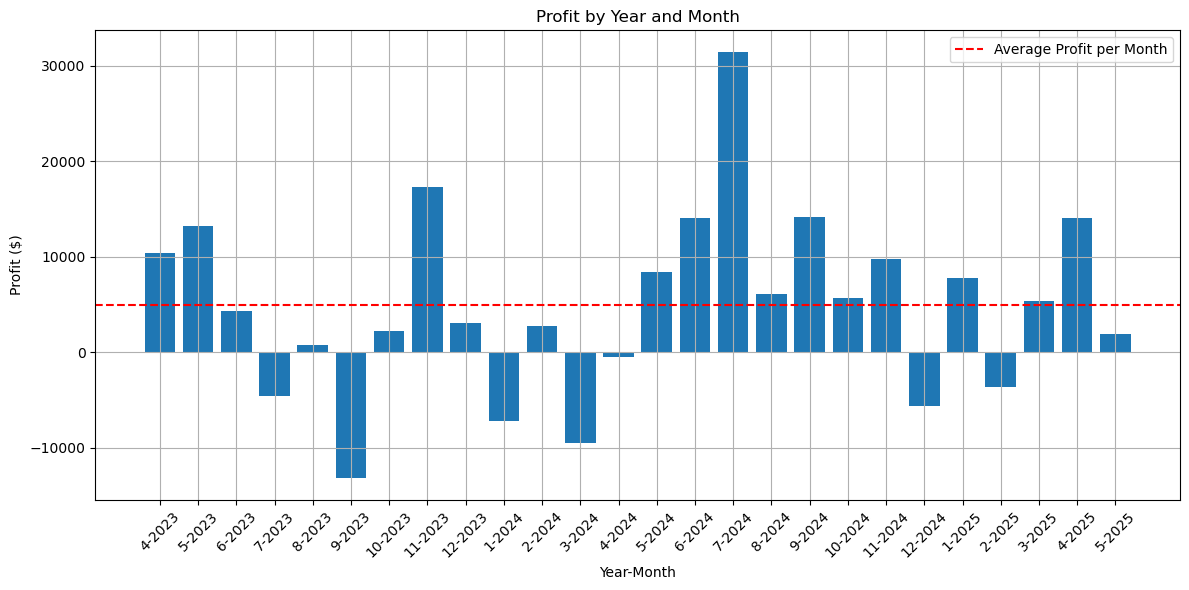

In [530]:
## Review the below chart

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.bar(df_dates_grouped['Month'].astype(str) + '-' + df_dates_grouped['Year'].astype(str), df_dates_grouped['Profitto_100'])
plt.axhline(y=average_profit_per_month_usd, color='r', linestyle='--', label='Average Profit per Month')
plt.title('Profit by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Profit ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [531]:
# group df_dates by Year and Month
df_dates_grouped_pct = df_dates.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_dates_grouped_pct.columns = ['Year', 'Month', 'Profit_pct_100']

# display the first 10 rows of the grouped DataFrame
df_dates_grouped_pct.head(10)

,Year,Month,Profit_pct_100
0,2023,4,10.412775
1,2023,5,13.167450
2,2023,6,4.327605
3,2023,7,-4.574565
4,2023,8,0.734335
5,2023,9,-13.211560
6,2023,10,2.219640
7,2023,11,17.265120
8,2023,12,3.097460
9,2024,1,-7.246220


In [532]:
# average Profit_pct_100
average_profit_pct_per_month_pct = df_dates_grouped_pct['Profit_pct_100'].mean().round(2)
average_profit_pct_per_month_pct

4.94

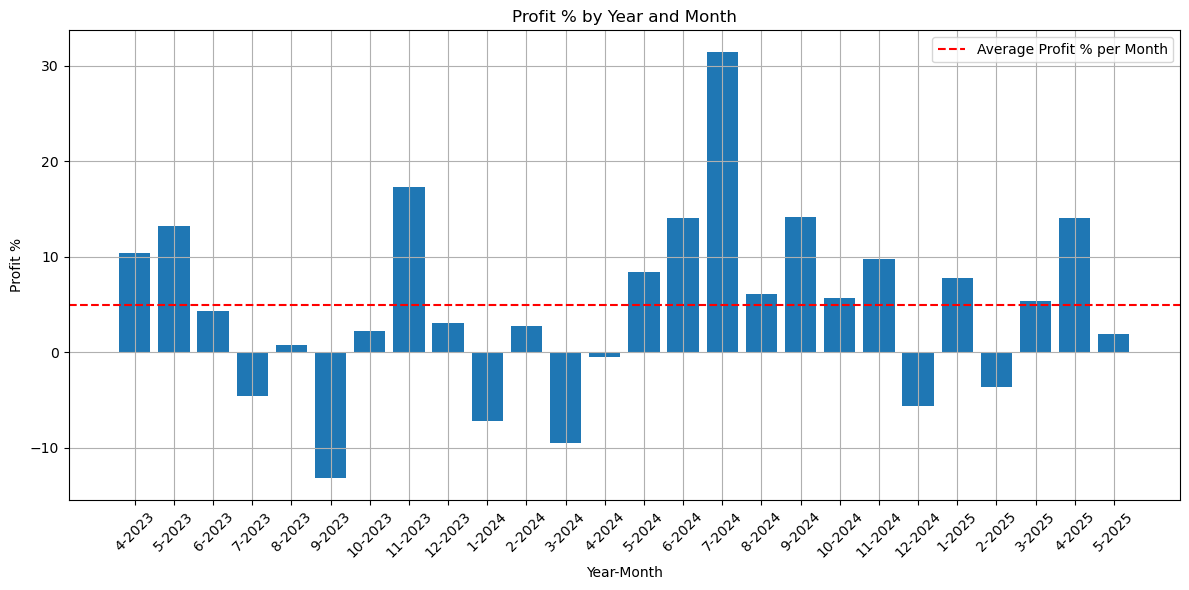

In [533]:
## Review the below chart

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.bar(df_dates_grouped_pct['Month'].astype(str) + '-' + df_dates_grouped_pct['Year'].astype(str), df_dates_grouped_pct['Profit_pct_100'])
plt.axhline(y=average_profit_pct_per_month_pct, color='r', linestyle='--', label='Average Profit % per Month')
plt.title('Profit % by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Profit %')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [534]:
# average profit per month
avg_profit_100 = df_dates_grouped.groupby('Month')['Profitto_100'].mean().reset_index()

# rename columns
avg_profit_100.columns = ['Month', 'Avg_Profitto_100']

# display the first 10 rows of the grouped DataFrame
avg_profit_100.head(12)

,Month,Avg_Profitto_100
0,1,278.235000
1,2,-471.025000
2,3,-2038.660000
3,4,7998.178333
4,5,7847.306667
5,6,9200.732500
6,7,13440.792500
7,8,3426.752500
8,9,452.000000
9,10,3945.185000


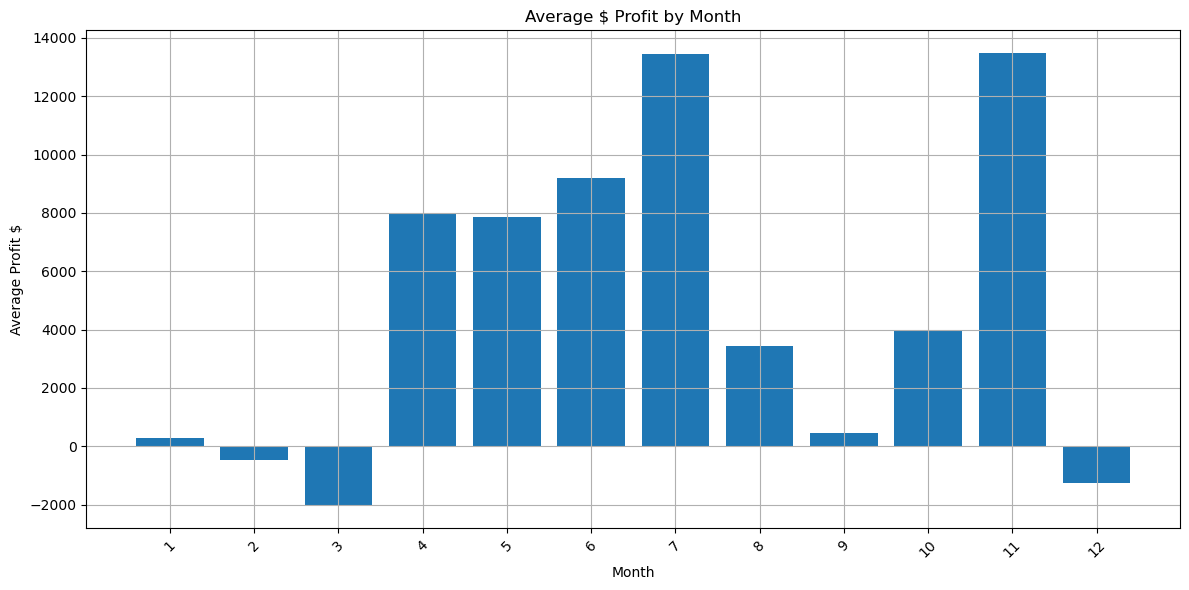

In [535]:
# bar plot avg_profit_100 
plt.figure(figsize=(12, 6))
plt.bar(avg_profit_100['Month'].astype(str), avg_profit_100['Avg_Profitto_100'])
plt.title('Average $ Profit by Month')
plt.xlabel('Month')
plt.ylabel('Average Profit $')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

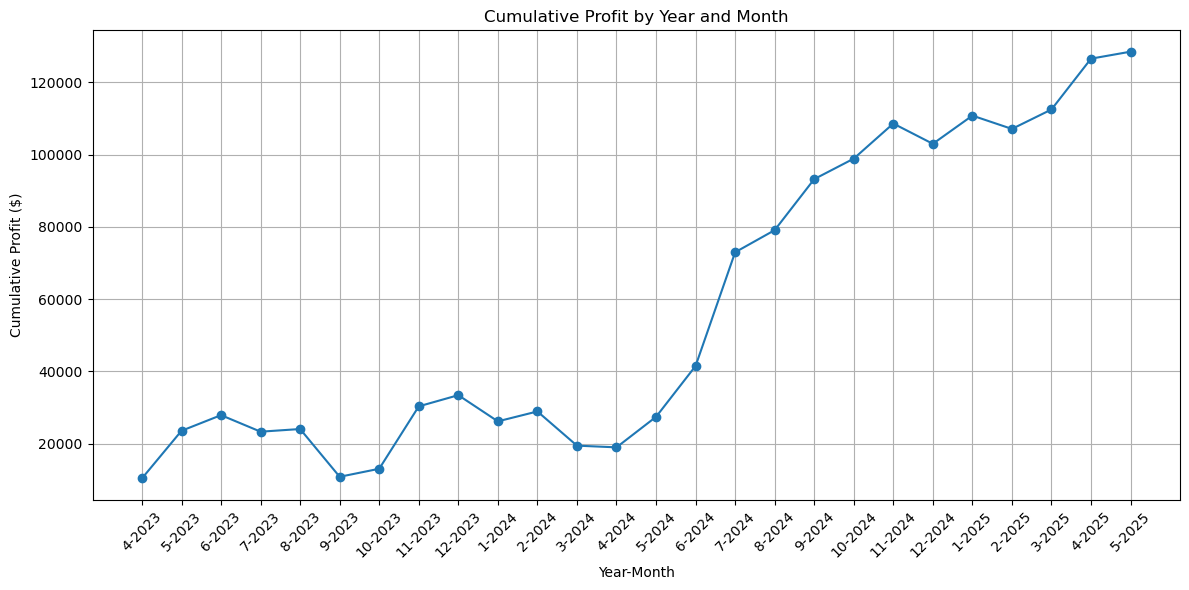

In [536]:
# calculate cumulative profit by year and month
df_dates_grouped['Cumulative_Profit'] = df_dates_grouped['Profitto_100'].cumsum()

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_dates_grouped['Month'].astype(str) + '-' + df_dates_grouped['Year'].astype(str), df_dates_grouped['Cumulative_Profit'], marker='o')
plt.title('Cumulative Profit by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit ($)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [537]:
# df_dates_grouped_pct.sample(3)

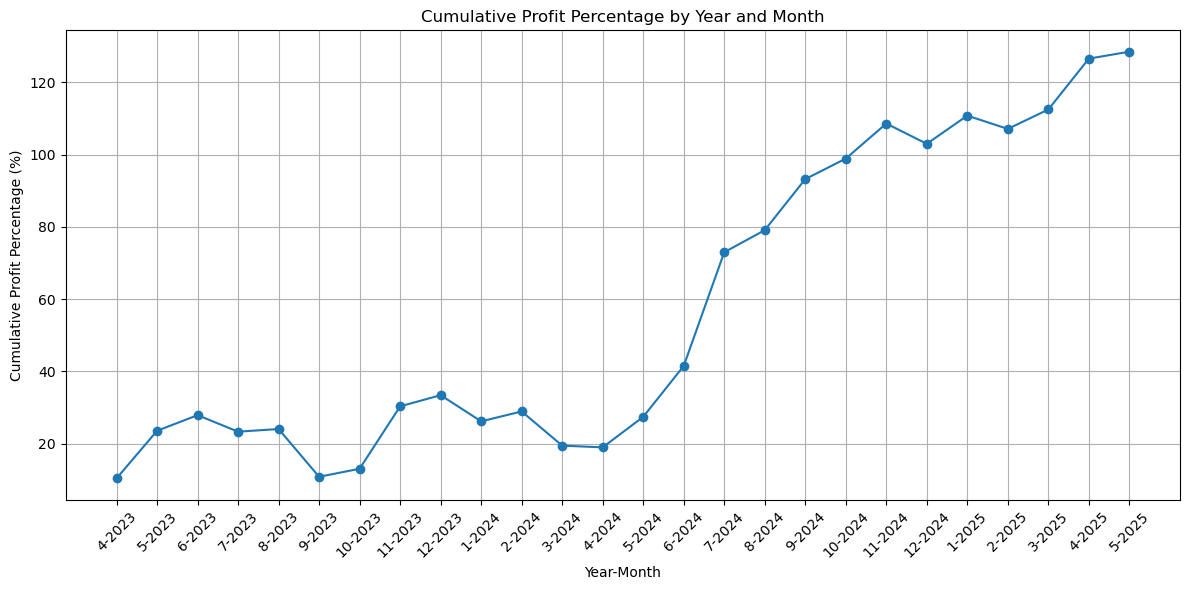

In [538]:
df_dates_grouped_pct = df_dates.copy()

# group df_dates_grouped_pct by Year and Month
df_dates_grouped_pct = df_dates_grouped_pct.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_dates_grouped_pct.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year and month
cum_profit_pct = df_dates_grouped_pct['Profit_pct_100'].cumsum()

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_dates_grouped_pct['Month'].astype(str) + '-' + df_dates_grouped_pct['Year'].astype(str), cum_profit_pct, marker='o')
plt.title('Cumulative Profit Percentage by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [539]:
# calculate the average profit percentage for each symbol
avg_profit_pct = df.groupby('Simbolo')['Profit_pct'].mean().sort_values(ascending=False).round(2)   

# Convert the result to a DataFrame
avg_profit_pct = avg_profit_pct.reset_index()

# Rename the columns
avg_profit_pct.columns = ['Simbolo', 'Average_Profit_Percentage']

# Display the result
avg_profit_pct.sort_values(by='Average_Profit_Percentage', ascending=False).head(10)

,Simbolo,Average_Profit_Percentage
0,XAGUSD,6.88
1,CHFJPY,0.52
2,LVMH,0.28
3,META,0.12
4,GBPJPY,0.11
5,US30,0.07
6,US100,0.06
7,NVDA,0.06
8,AUDCAD,0.05
9,AAPL,0.04


In [ ]:
# average profit pct per month
avg_profit_100_pct = df_100.groupby('Month')['Profit_pct_100'].mean().reset_index()

# rename columns
avg_profit_100_pct.columns = ['Month', 'Avg_Profit_pct_100']

# display the first 10 rows of the grouped DataFrame
avg_profit_100_pct.head(12)

,Month,Avg_Profit_pct_100
0,1,0.000522
1,2,-0.001465
2,3,-0.005671
3,4,0.041228
4,5,0.085297
5,6,0.054282
6,7,0.051009
7,8,0.017395
8,9,0.002790
9,10,0.016682


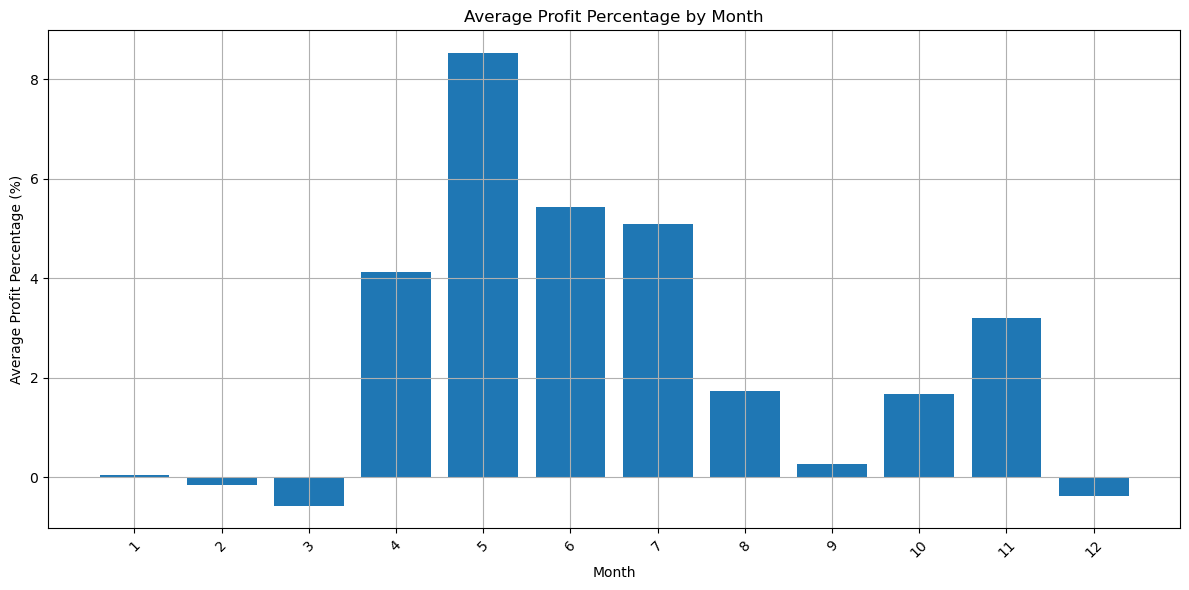

In [541]:
# bar plot avg_profit_100_pct
plt.figure(figsize=(12, 6))
plt.bar(avg_profit_100_pct['Month'].astype(str), avg_profit_100_pct['Avg_Profit_pct_100']*100)
plt.title('Average Profit Percentage by Month')
plt.xlabel('Month')
plt.ylabel('Average Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [542]:
df_3_months = df_100.copy()

from datetime import datetime, timedelta

# Get the current date
today = datetime.now()

# Calculate the date 3 months ago
three_months_ago = today - timedelta(days=90)

# filter the dataframe for the last 3 months
df_3_months_filtered = df_3_months.loc[
    (pd.to_datetime(df_3_months['Year'].astype(str) + '-' + df_3_months['Month'].astype(str) + '-01') >= three_months_ago) &
    (pd.to_datetime(df_3_months['Year'].astype(str) + '-' + df_3_months['Month'].astype(str) + '-01') <= today)
]

In [543]:
df_3_months_filtered.sample(5)

,Ticket,Apri,Tipologia,Volume,Simbolo,Prezzo,SL,TP,Chiudi,Prezzo.1,...,Account_Type,Account_Amount,Profit_pct,Month,Year,Asset,Prop,Day,Profitto_100,Profit_pct_100
6785,29995430,2025-05-09 05:00:13,sell,5.03,JP225,37425.73,39623.2,34159.03,2025-05-21 09:15:30,37338.27,...,Funded,100000,0.00,5,2025,Indexes,FTMO,9,3.06,0.00306
6716,98304212,2025-04-08 20:30:01,buy,7.00,V,314.21,299.52,333.57,2025-04-09 22:52:32,333.5,...,Funded,100000,0.14,4,2025,Stocks,FTMO,8,135.03,0.13503
6755,41314143,2025-05-08 04:00:00,buy,0.04,US100,19946.21,18649.59,21573.45,2025-05-08 06:00:00,20015.2,...,Challenge,100000,0.03,5,2025,Indexes,FNEXT,8,27.60,0.02760
6786,29249176,2025-04-25 21:00:01,buy,5.03,JP225,35746.27,33365.11,39351.79,2025-05-21 09:15:29,37332.73,...,Funded,100000,0.06,4,2025,Indexes,FTMO,25,55.55,0.05555
6322,39733159,2025-04-04 02:01:31,sell,0.30,US100,18486.0,18485.43,17859.05,2025-04-04 05:00:22,18485.63,...,Challenge,100000,0.00,4,2025,Indexes,FNEXT,4,1.11,0.00111


In [544]:
# from df_3_months_filtered calculate best and worst symbols
best_simbol_3_months = df_3_months_filtered.groupby('Simbolo')['Profitto_100'].sum().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_3_months = best_simbol_3_months.reset_index()

# Rename the columns
best_simbol_3_months.columns = ['Symbol', '3_Months_Loss']

# Display the result
best_simbol_3_months.sort_values(by='3_Months_Loss', ascending=False).head(10)
best_simbol_3_months

,Symbol,3_Months_Loss
0,US100,12757.24
1,GER40,1408.65
2,US500,1278.83
3,V,398.67
4,JP225,81.08
5,XAUUSD,66.26


In [545]:
# worst symbols
worst_simbol_3_months = best_simbol_3_months.sort_values(by='3_Months_Loss', ascending=True).head(10)
worst_simbol_3_months

,Symbol,3_Months_Loss
5,XAUUSD,66.26
4,JP225,81.08
3,V,398.67
2,US500,1278.83
1,GER40,1408.65
0,US100,12757.24


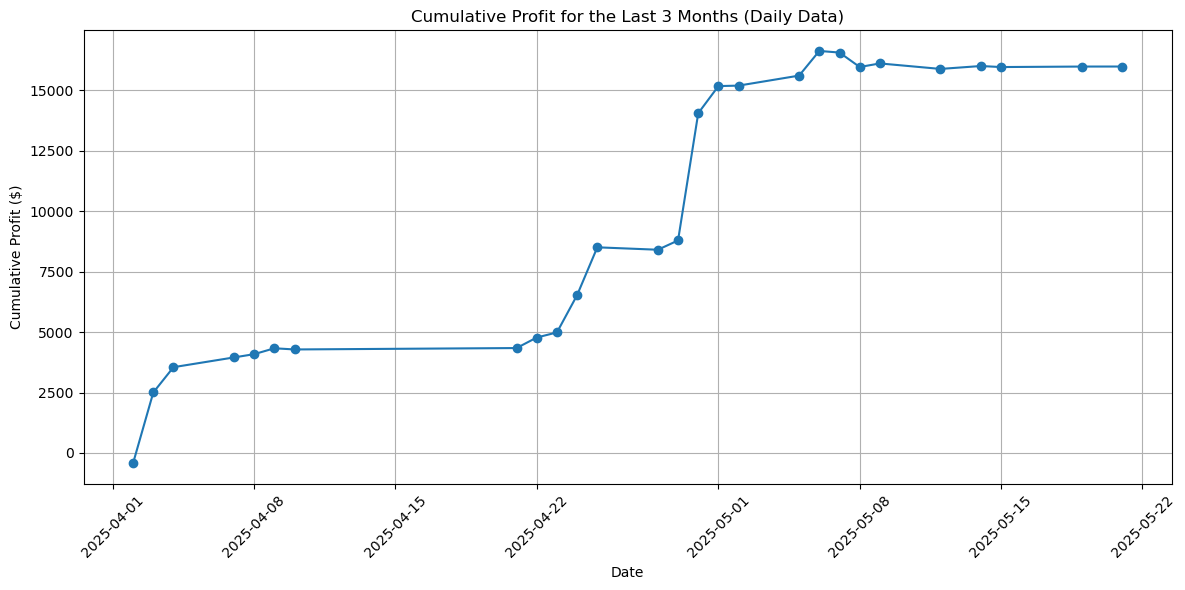

In [546]:
# Raggruppa per Year, Month e Day e calcola la somma dei profitti
df_3_months_filtered_cumsum = df_3_months_filtered.groupby(['Year', 'Month', 'Day']).agg({'Profitto_100': 'sum'}).reset_index()

# Ordina per data (opzionale, ma utile per il plot)
df_3_months_filtered_cumsum = df_3_months_filtered_cumsum.sort_values(['Year', 'Month', 'Day'])

# Crea una colonna data per l'asse x
df_3_months_filtered_cumsum['Date'] = pd.to_datetime(df_3_months_filtered_cumsum[['Year', 'Month', 'Day']])

# Plot del grafico aggiornato
plt.figure(figsize=(12, 6))
plt.plot(df_3_months_filtered_cumsum['Date'], df_3_months_filtered_cumsum['Profitto_100'].cumsum(), marker='o')
plt.title('Cumulative Profit for the Last 3 Months (Daily Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit ($)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

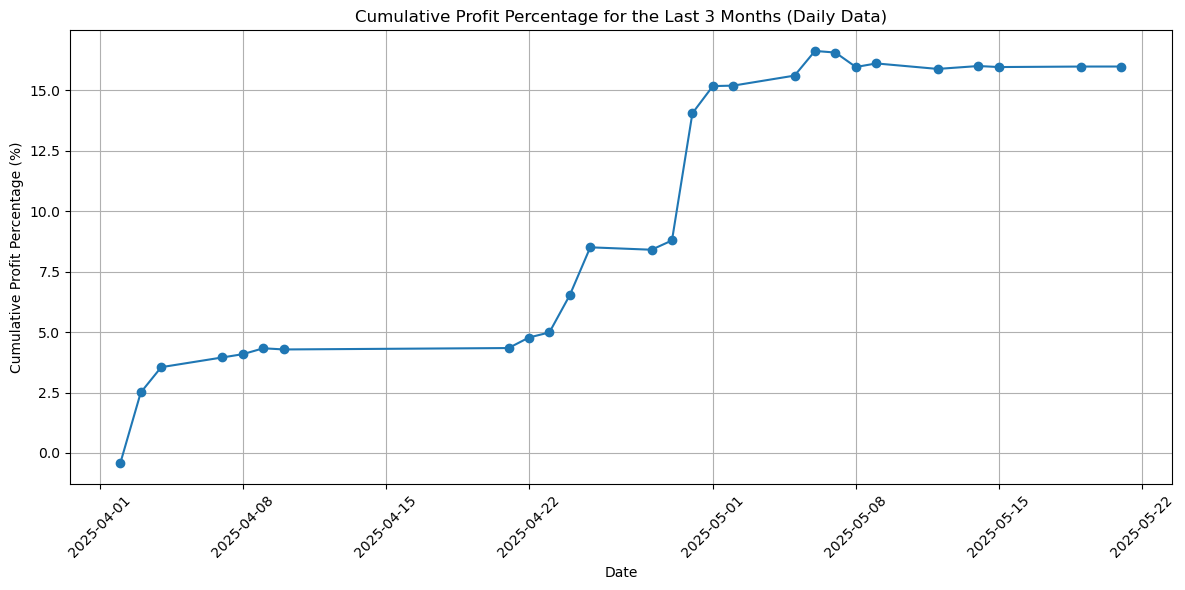

In [547]:
# Raggruppa per Month, Year e Day e calcola la somma dei profitti percentuali
df_3_months_filtered_cumsum_pct = df_3_months_filtered.groupby(['Month', 'Year', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# Ordina per data (utile per il plot)
df_3_months_filtered_cumsum_pct = df_3_months_filtered_cumsum_pct.sort_values(['Year', 'Month', 'Day'])

# Crea una colonna data per l'asse x
df_3_months_filtered_cumsum_pct['Date'] = pd.to_datetime(df_3_months_filtered_cumsum_pct[['Year', 'Month', 'Day']])

# Plot del grafico aggiornato
plt.figure(figsize=(12, 6))
plt.plot(df_3_months_filtered_cumsum_pct['Date'], df_3_months_filtered_cumsum_pct['Profit_pct_100'].cumsum(), marker='o')
plt.title('Cumulative Profit Percentage for the Last 3 Months (Daily Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [548]:
# win rate calculation for df_100

# Calculate the number of winning trades
winning_trades = df_100[df_100['Profitto_100'] > 0].shape[0]

# Calculate the total number of trades
total_trades = df_100.shape[0]

# Calculate the win rate
win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0

# Display the win rate
print(f"Win Rate: {win_rate:.2f}%")

Win Rate: 52.03%


In [549]:
# win rate calculation for df_3_months_filtered

# Calculate the number of winning trades for the last 3 months
winning_trades_3_months = df_3_months_filtered[df_3_months_filtered['Profitto_100'] > 0].shape[0]

# Calculate the total number of trades for the last 3 months
total_trades_3_months = df_3_months_filtered.shape[0]

# Calculate the win rate for the last 3 months
win_rate_3_months = (winning_trades_3_months / total_trades_3_months) * 100 if total_trades_3_months > 0 else 0

# Display the win rate for the last 3 months
print(f"Win Rate for the Last 3 Months: {win_rate_3_months:.2f}%")

Win Rate for the Last 3 Months: 64.20%


In [550]:
# count total number of trades for the whole dataset
total_trades_all = df_100.shape[0]

# Display the total number of trades
print(f"Total Number of Trades: {total_trades_all}")

Total Number of Trades: 6854


In [551]:
# Number of trades per day
trades_per_day = df_100.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Trades_Count')

# Display the first few rows of trades_per_day
trades_per_day.head(10)

,Year,Month,Day,Trades_Count
0,2023,4,17,9
1,2023,4,18,5
2,2023,4,19,5
3,2023,4,20,3
4,2023,4,21,5
5,2023,4,24,2
6,2023,4,26,4
7,2023,4,28,5
8,2023,5,1,5
9,2023,5,2,5


In [552]:
# average number of trades per day
avg_trades_per_day = trades_per_day['Trades_Count'].mean()

# Display the average number of trades per day
print(f"Average Number of Trades per Day: {avg_trades_per_day:.2f}")

Average Number of Trades per Day: 13.76


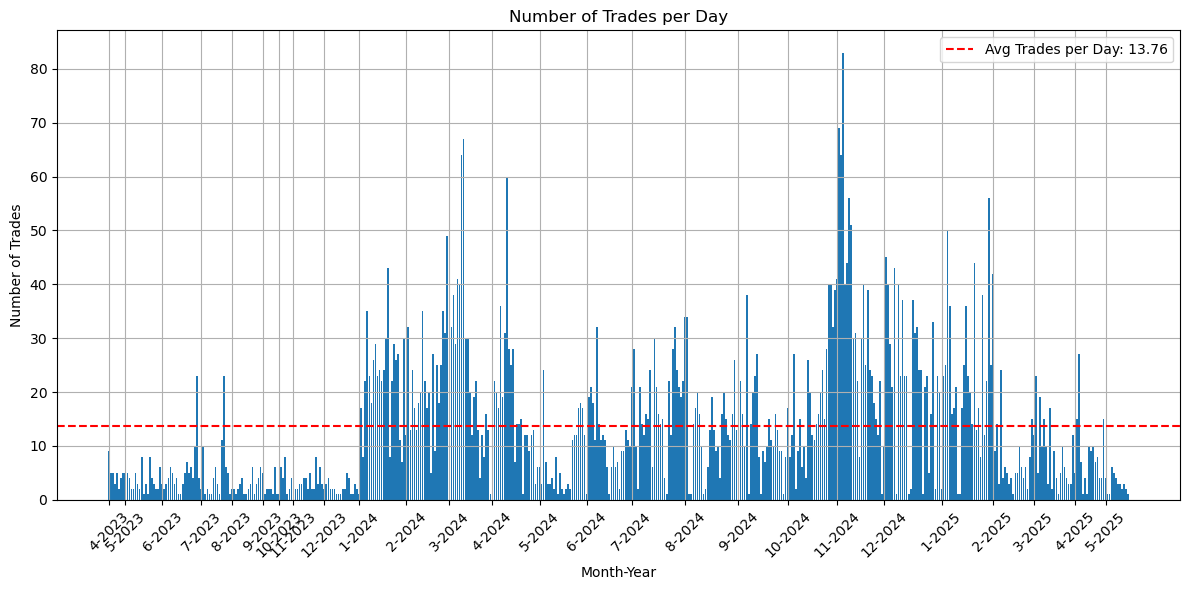

In [553]:
# trades_per_day plot with bar chart, with avg_trades_per_day horizontal line
plt.figure(figsize=(12, 6))
plt.bar(trades_per_day.index, trades_per_day['Trades_Count'])

# Days grouped by Month and Year for x-axis labels
month_year = trades_per_day['Month'].astype(str) + '-' + trades_per_day['Year'].astype(str)
_, tick_positions = np.unique(month_year, return_index=True)
tick_labels = month_year.iloc[tick_positions].values

plt.axhline(y=avg_trades_per_day, color='r', linestyle='--', label=f'Avg Trades per Day: {avg_trades_per_day:.2f}')
plt.title('Number of Trades per Day')
plt.xlabel('Month-Year')
plt.ylabel('Number of Trades')
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [554]:
# Create filtered dataframes for each symbol/asset
df_nq_100 = df_100[df_100['Simbolo'] == 'US100'].copy()
df_spx_100 = df_100[df_100['Simbolo'] == 'US500'].copy()
df_us30_100 = df_100[df_100['Simbolo'] == 'US30'].copy()
df_stocks_100 = df_100[df_100['Asset'] == 'Stocks'].copy()

In [557]:
# df_nq group by Year, Month and day columns
df_nq_grouped = df_nq_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_nq_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_nq_grouped['Cumulative_Profit'] = np.log(1 + df_nq_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

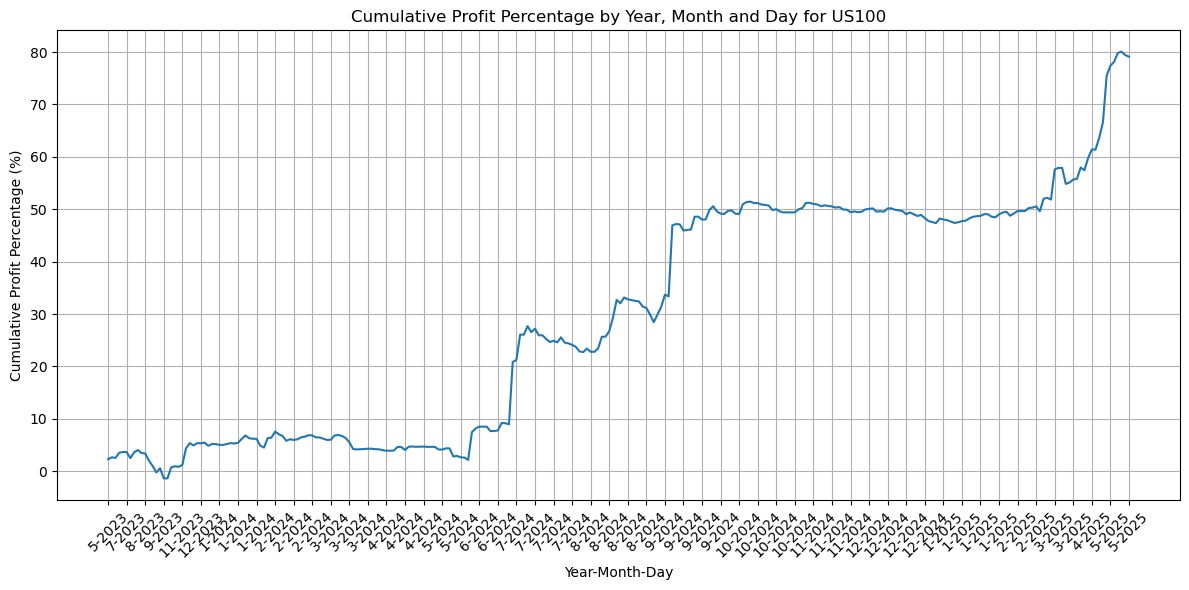

In [558]:
# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_nq_grouped['Day'].astype(str) + '-' + df_nq_grouped['Month'].astype(str) + '-' + df_nq_grouped['Year'].astype(str), df_nq_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit Percentage by Year, Month and Day for US100')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(
	ticks=range(0, len(df_nq_grouped), 5),
	labels=(df_nq_grouped['Month'].astype(str) + '-' + df_nq_grouped['Year'].astype(str))[::5],
	rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


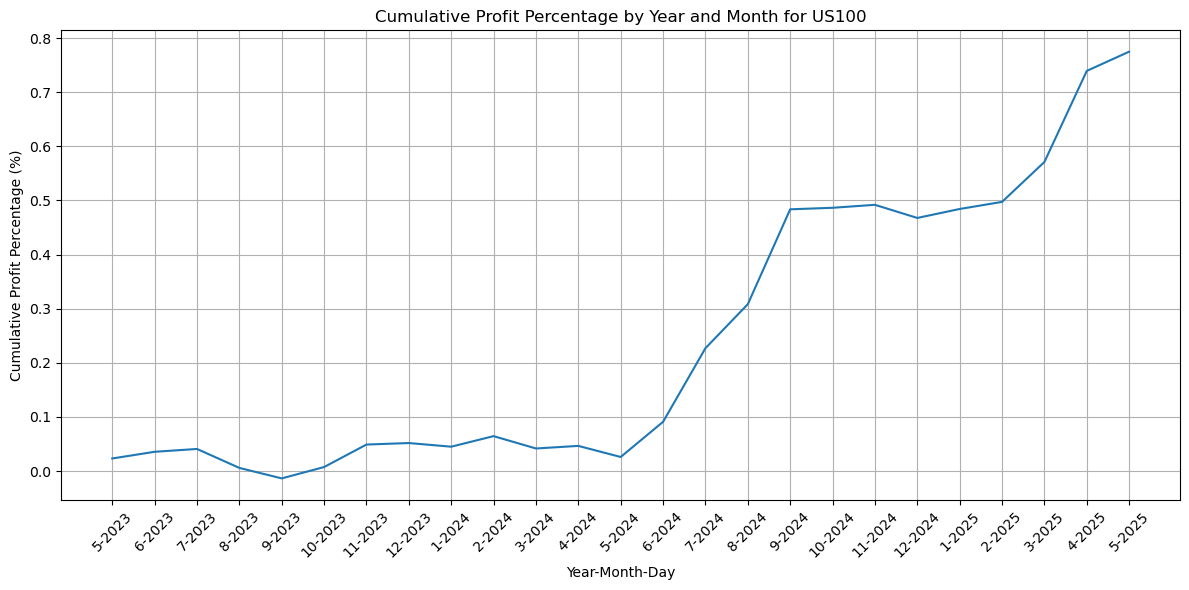

In [559]:
# df_nq group by Year, Month
df_nq_grouped_month_year = df_nq_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_nq_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month using log returns
df_nq_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_nq_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_nq_grouped_month_year['Month'].astype(str) + '-' + df_nq_grouped_month_year['Year'].astype(str), df_nq_grouped_month_year['Cumulative_Profit'])
plt.title('Cumulative Profit Percentage by Year and Month for US100')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


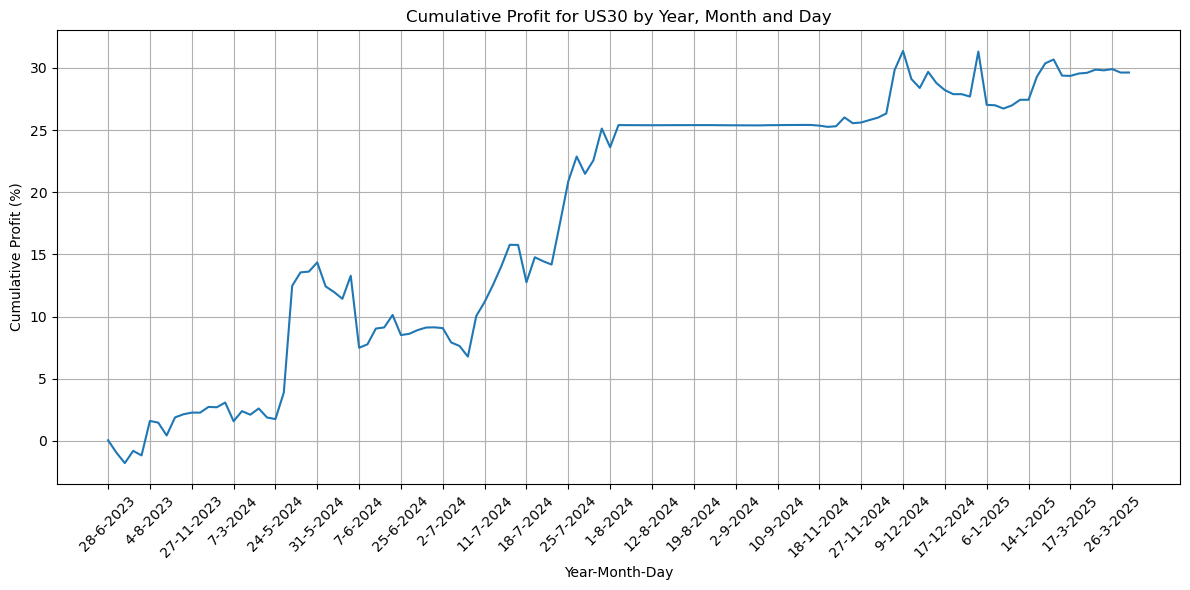

In [560]:
# df_us30 group by Year, Month and day columns
df_us30_grouped = df_us30_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_us30_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_us30_grouped['Cumulative_Profit'] = np.log(1 + df_us30_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_us30_grouped['Day'].astype(str) + '-' + df_us30_grouped['Month'].astype(str) + '-' + df_us30_grouped['Year'].astype(str), df_us30_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US30 by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(
	ticks=range(0, len(df_us30_grouped), 5),
	labels=(df_us30_grouped['Day'].astype(str) + '-' + df_us30_grouped['Month'].astype(str) + '-' + df_us30_grouped['Year'].astype(str))[::5],
	rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

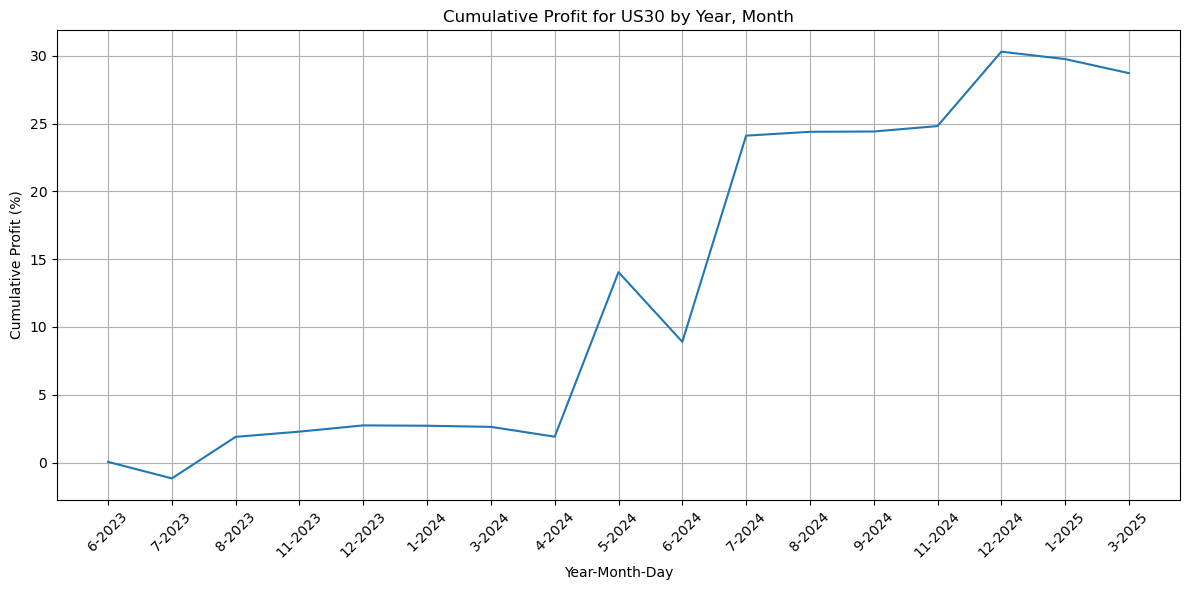

In [561]:
# df_us30 group by Year, Month
df_us30_grouped_month_year = df_us30_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_us30_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_us30_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_us30_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_us30_grouped_month_year['Month'].astype(str) + '-' + df_us30_grouped_month_year['Year'].astype(str), df_us30_grouped_month_year['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US30 by Year, Month')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

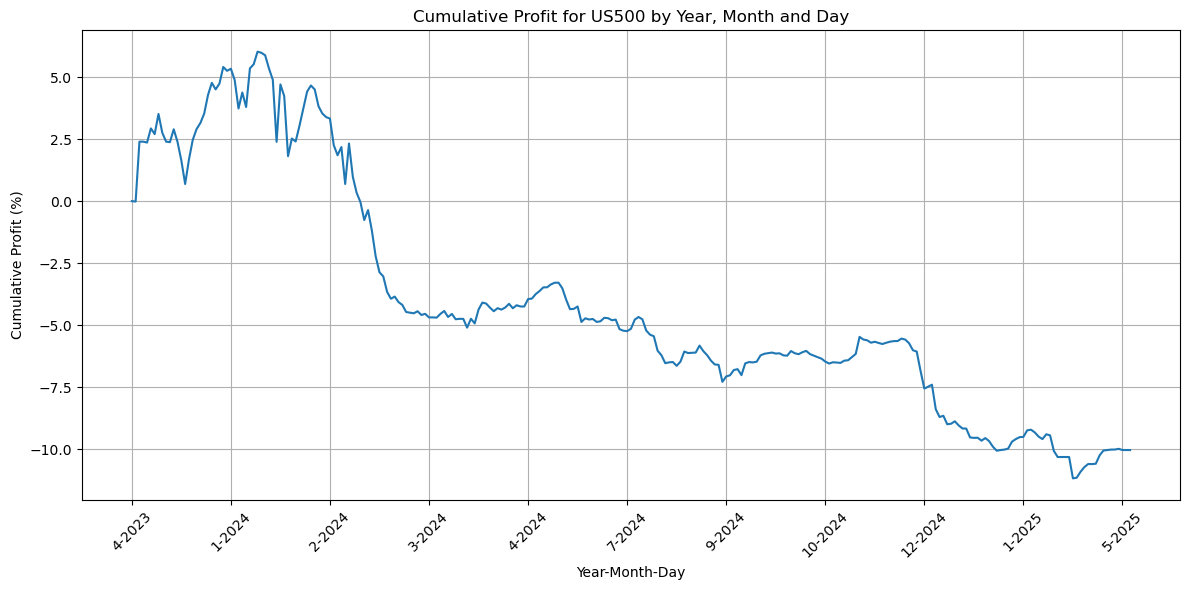

In [562]:
# df_spx group by Year, Month and day columns
df_spx_grouped = df_spx_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_spx_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_spx_grouped['Cumulative_Profit'] = np.log(1 + df_spx_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_spx_grouped['Day'].astype(str) + '-' + df_spx_grouped['Month'].astype(str) + '-' + df_spx_grouped['Year'].astype(str), df_spx_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US500 by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(ticks=range(0, len(df_spx_grouped), max(1, len(df_spx_grouped)//10)), 
           labels=(df_spx_grouped['Month'].astype(str) + '-' + df_spx_grouped['Year'].astype(str))[::max(1, len(df_spx_grouped)//10)],
           rotation=45)           
plt.grid()
plt.tight_layout()
plt.show()

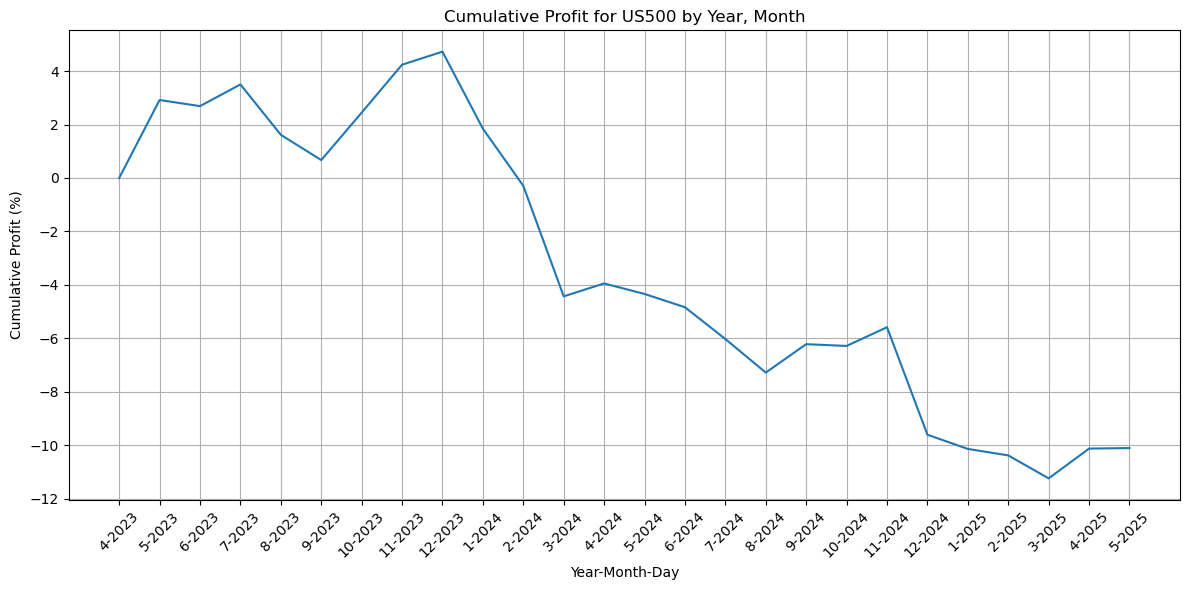

In [563]:
# df_spx group by Year, Month
df_spx_grouped_month_year = df_spx_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_spx_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_spx_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_spx_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_spx_grouped_month_year['Month'].astype(str) + '-' + df_spx_grouped_month_year['Year'].astype(str), df_spx_grouped_month_year['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US500 by Year, Month')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(rotation=45)           
plt.grid()
plt.tight_layout()
plt.show()

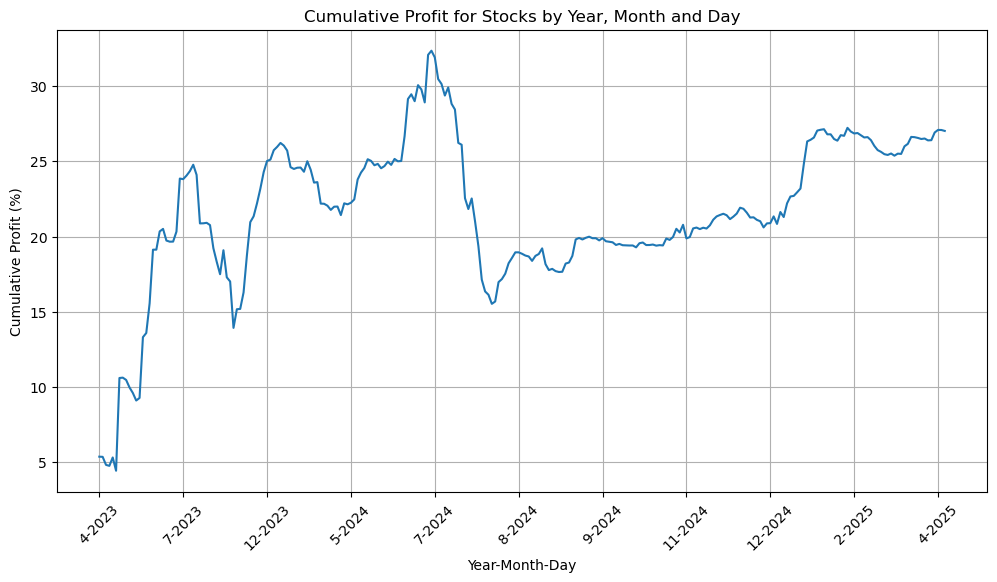

In [564]:
# df_stocks_100 group by Year, Month and day columns
df_stocks_grouped = df_stocks_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_stocks_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']  

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_stocks_grouped['Cumulative_Profit'] = np.log(1 + df_stocks_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_stocks_grouped['Day'].astype(str) + '-' + df_stocks_grouped['Month'].astype(str) + '-' + df_stocks_grouped['Year'].astype(str), df_stocks_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Stocks by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
# plt.xticks(rotation=45)
# plt.xticks(ticks=range(0, len(df_stocks_grouped), max(1, len(df_stocks_grouped) // 10)), 
#            labels=(df_stocks_grouped['Day'].astype(str) + '-' + df_stocks_grouped['Month'].astype(str) + '-' + df_stocks_grouped['Year'].astype(str))[::max(1, len(df_stocks_grouped) // 10)], 
#            rotation=45)
plt.xticks(ticks=range(0, len(df_stocks_grouped), max(1, len(df_stocks_grouped) // 10)), 
           labels=(df_stocks_grouped['Month'].astype(str) + '-' + df_stocks_grouped['Year'].astype(str))[::max(1, len(df_stocks_grouped) // 10)], 
           rotation=45)
plt.grid()
plt.show()

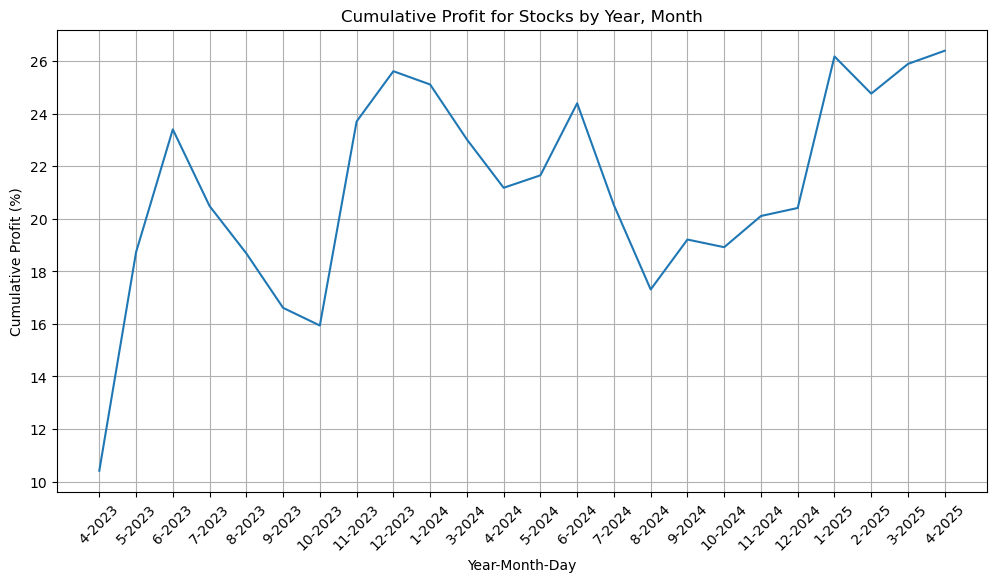

In [565]:
# df_stocks_100 group by Year, Month
df_stocks_grouped_month_year = df_stocks_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_stocks_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']  

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_stocks_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_stocks_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_stocks_grouped_month_year['Month'].astype(str) + '-' + df_stocks_grouped_month_year['Year'].astype(str), df_stocks_grouped_month_year['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Stocks by Year, Month')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [566]:
# df_nq_grouped_month_year.info()
# df_spx_grouped_month_year.info()
# df_us30_grouped_month_year.info()   
# df_stocks_grouped_month_year.info()

In [567]:
# # check again, maybe wrong

# # Plot df_nq_grouped_month_year, df_us30_grouped_month_year and df_spx_grouped_month_year and df_stocks_grouped_month_year
# plt.figure(figsize=(12, 6))
# plt.plot(df_nq_grouped_month_year['Month'].astype(str) + '-' + df_nq_grouped_month_year['Year'].astype(str), df_nq_grouped_month_year['Cumulative_Profit']*100, label='US100')
# plt.plot(df_us30_grouped_month_year['Month'].astype(str) + '-' + df_us30_grouped_month_year['Year'].astype(str), df_us30_grouped_month_year['Cumulative_Profit']*100, label='US30')
# plt.plot(df_spx_grouped_month_year['Month'].astype(str) + '-' + df_spx_grouped_month_year['Year'].astype(str), df_spx_grouped_month_year['Cumulative_Profit']*100, label='US500')
# plt.plot(df_stocks_grouped_month_year['Month'].astype(str) + '-' + df_stocks_grouped_month_year['Year'].astype(str), df_stocks_grouped_month_year['Cumulative_Profit']*100, label='Stocks')
# plt.title('Cumulative Profit for US100, US30, US500 and Stocks by Year and Month')
# plt.xlabel('Year-Month')    
# plt.ylabel('Cumulative Profit (%)')
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid()
# plt.tight_layout()
# plt.show()

In [568]:
# # Check unique values in column Apri
# df_100_no_5ers['Apri'].unique()

In [ ]:
# download the file to csv
# df_100_no_5ers.to_csv(r'C:\Users\.....................\\py\prop\df_100_no_5ers.csv', index=False, sep=';')

In [570]:
# df_nq.sample(2)
# df_nq.info()

In [571]:
# Create copy of df_100 without 5% values
df_100_no_5ers = df_100.copy()

# drop rows where Prop is 5%
df_100_no_5ers = df_100_no_5ers[df_100_no_5ers['Prop'] != '5%']

# convert Apri and Chiudi to datetime, handling mixed formats
df_100_no_5ers['Apri'] = pd.to_datetime(df_100_no_5ers['Apri'], errors='coerce', dayfirst=True)
df_100_no_5ers['Chiudi'] = pd.to_datetime(df_100_no_5ers['Chiudi'], errors='coerce', dayfirst=True)

# Create a copy of the dataframes for US30, US500, and US100
df_nq = df_100_no_5ers[df_100_no_5ers['Simbolo'] == 'US100'].copy()
df_us30 = df_100_no_5ers[df_100_no_5ers['Simbolo'] == 'US30'].copy()    
df_spx = df_100_no_5ers[df_100_no_5ers['Simbolo'] == 'US500'].copy()
df_stocks = df_100_no_5ers[df_100_no_5ers['Asset'] == 'Stocks'].copy()

# sort df_nq, df_us30, df_spx, df_stocks by Apri
df_nq_sorted = df_nq.sort_values(by='Apri')
df_us30_sorted = df_us30.sort_values(by='Apri')
df_spx_sorted = df_spx.sort_values(by='Apri')
df_stocks_sorted = df_stocks.sort_values(by='Apri')

In [573]:
# # calculate cumulative return for df_nq, df_us30, df_spx and df_stocks 
df_nq_sorted['Cumulative_Return'] = np.log(1 + df_nq_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1
df_us30_sorted['Cumulative_Return'] = np.log(1 + df_us30_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1
df_spx_sorted['Cumulative_Return'] = np.log(1 + df_spx_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1
df_stocks_sorted['Cumulative_Return'] = np.log(1 + df_stocks_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

In [574]:
# df_spx_sorted.tail(10)
# df_nq_sorted.tail(10)
# df_spx_sorted.sample(5)

In [575]:
# sort sorted dfs, by year, month and day
# df_nq_sorted['Year'] = df_nq_sorted['Apri'].dt.year

In [576]:
# count sorted df, column Apri count na
# df_nq_sorted['Apri'].isna().sum()
# df_us30_sorted['Apri'].isna().sum()
# df_spx_sorted['Apri'].isna().sum()
# df_nq_sorted.info()

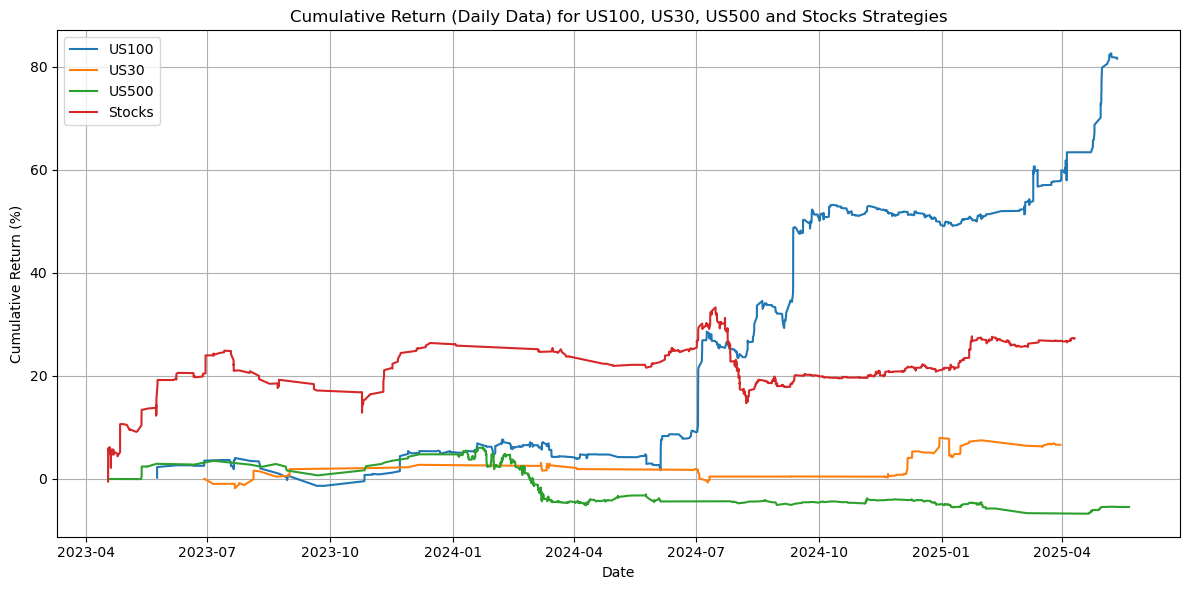

In [577]:
# plot cumulative return for df_nq, df_us30, df_spx and df_stocks
plt.figure(figsize=(12, 6))
plt.plot(df_nq_sorted['Apri'], df_nq_sorted['Cumulative_Return']*100, label='US100')
plt.plot(df_us30_sorted['Apri'], df_us30_sorted['Cumulative_Return']*100, label='US30') 
plt.plot(df_spx_sorted['Apri'], df_spx_sorted['Cumulative_Return']*100, label='US500')
plt.plot(df_stocks_sorted['Apri'], df_stocks_sorted['Cumulative_Return']*100, label='Stocks')
plt.title('Cumulative Return (Daily Data) for US100, US30, US500 and Stocks Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Analysis from OBB library

In [579]:
# # As a target benchmark, we will use SPY, QQQ, and DIA

# # download data for SPY, QQQ, and DIA from yFinance
# from openbb import obb

# symbols = ['SPY', 'QQQ', 'DIA']
# start_date = '2023-04-01'

# dataframes = []

# for symbol in symbols:
#     try:
#         data = obb.equity.price.historical(
#             symbol=symbol,
#             start_date=start_date,
#             provider="yfinance"
#         ).to_df()
#         data['Symbol'] = symbol
#         dataframes.append(data)
#     except Exception as e:
#         print(f"Failed to fetch data for {symbol}: {str(e)}")

# combined_data = pd.concat(dataframes)
# combined_data = combined_data.reset_index()

# # combined_data.head()

# # the following 3 rows need to be corrected
# combined_data_spy = df_sp500.copy()
# combined_data_dia = df_dia.copy()
# combined_data_qqq = df_qqq.copy()

# combined_data_spy['daily_return'] = combined_data_spy['Close'].pct_change()
# combined_data_dia['daily_return'] = combined_data_dia['Close'].pct_change()
# combined_data_qqq['daily_return'] = combined_data_qqq['Close'].pct_change()

# # calculate the cumulative returns using log returns
# combined_data_spy['cumulative_return'] = np.log(1 + combined_data_spy['daily_return']).cumsum().apply(np.exp) - 1
# combined_data_dia['cumulative_return'] = np.log(1 + combined_data_dia['daily_return']).cumsum().apply(np.exp) - 1
# combined_data_qqq['cumulative_return'] = np.log(1 + combined_data_qqq['daily_return']).cumsum().apply(np.exp) - 1

## Analysis from csv file, for SPY Only


In [ ]:
# csv url
url = r'C:\Users\.....................\SPY_data.csv'

# read csv file from url   
df_sp500 = pd.read_csv(url, sep=',', index_col=0, parse_dates=True)

# keep only DatetimeIndex higher that df_100_no_5ers['Apri'].min() and lower than end_date = df_100_no_5ers['Chiudi'].max()
df_sp500 = df_sp500.loc[
    (df_sp500.index >= df_100_no_5ers['Apri'].min()) &
    (df_sp500.index <= df_100_no_5ers['Chiudi'].max())
]

#df_sp500.head()

combined_data_spy = df_sp500.copy()

combined_data_spy['daily_return'] = combined_data_spy['Close'].pct_change()

# calculate the cumulative returns using log returns
combined_data_spy['cumulative_return'] = np.log(1 + combined_data_spy['daily_return']).cumsum().apply(np.exp) - 1

combined_data_spy.head()

,Open,High,Low,Close,Volume,daily_return,cumulative_return
Date,,,,,,,
2023-04-18,404.499544,404.635826,401.774211,403.166077,63560000,NaN,NaN
2023-04-19,401.229141,404.012871,401.170743,403.097961,55227300,-0.000169,-0.000169
2023-04-20,400.246075,402.669705,399.331135,400.898224,75840400,-0.005457,-0.005625
2023-04-21,401.199974,401.676900,399.233843,401.209717,73457400,0.000777,-0.004852
2023-04-24,401.005315,402.056536,399.652391,401.628265,64332100,0.001043,-0.003814


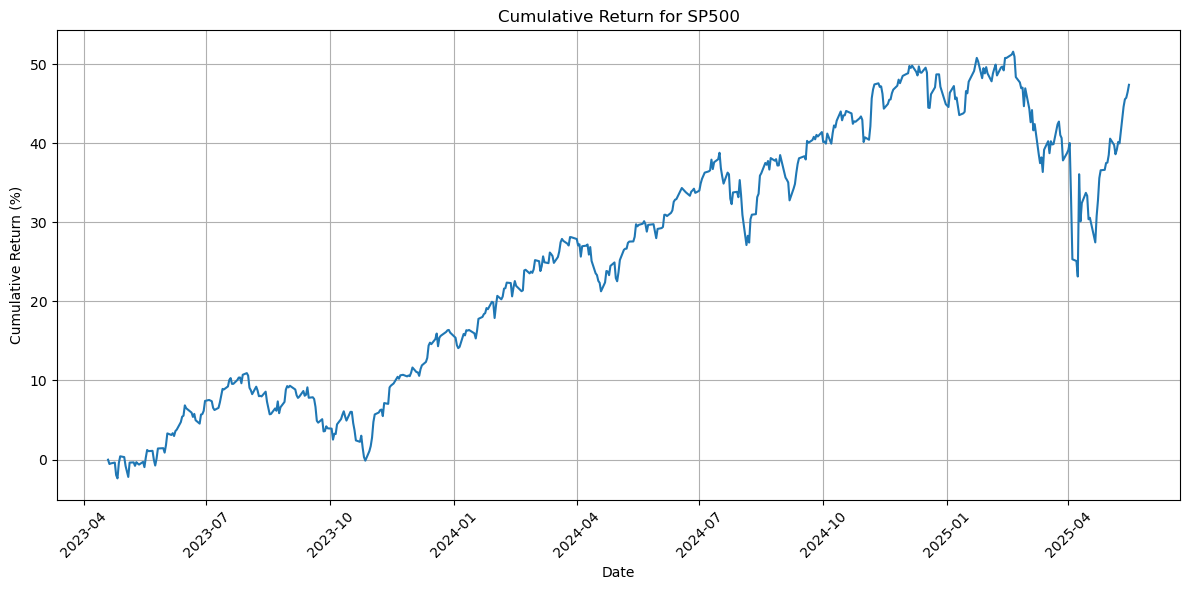

In [581]:
# plot combined_data_spy cumulative_return column
plt.figure(figsize=(12, 6))
plt.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SP500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Return for SP500')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

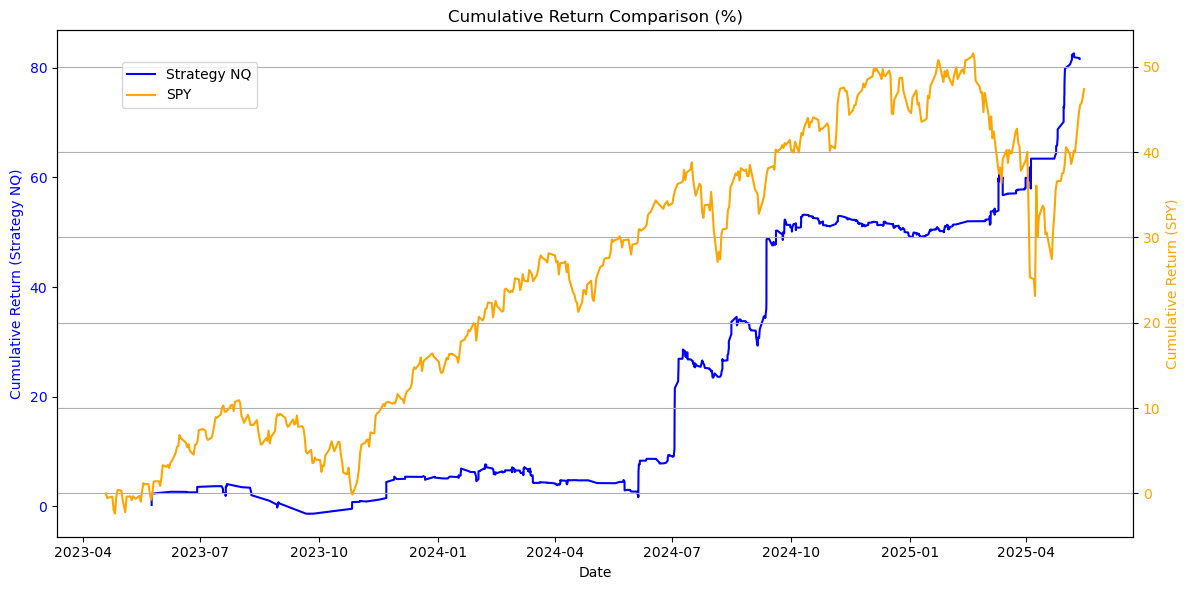

In [582]:
# Use two different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first dataset on the primary y-axis
ax1.plot(df_nq_sorted['Apri'], df_nq_sorted['Cumulative_Return']*100, label='Strategy NQ', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategy NQ)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()
plt.show()

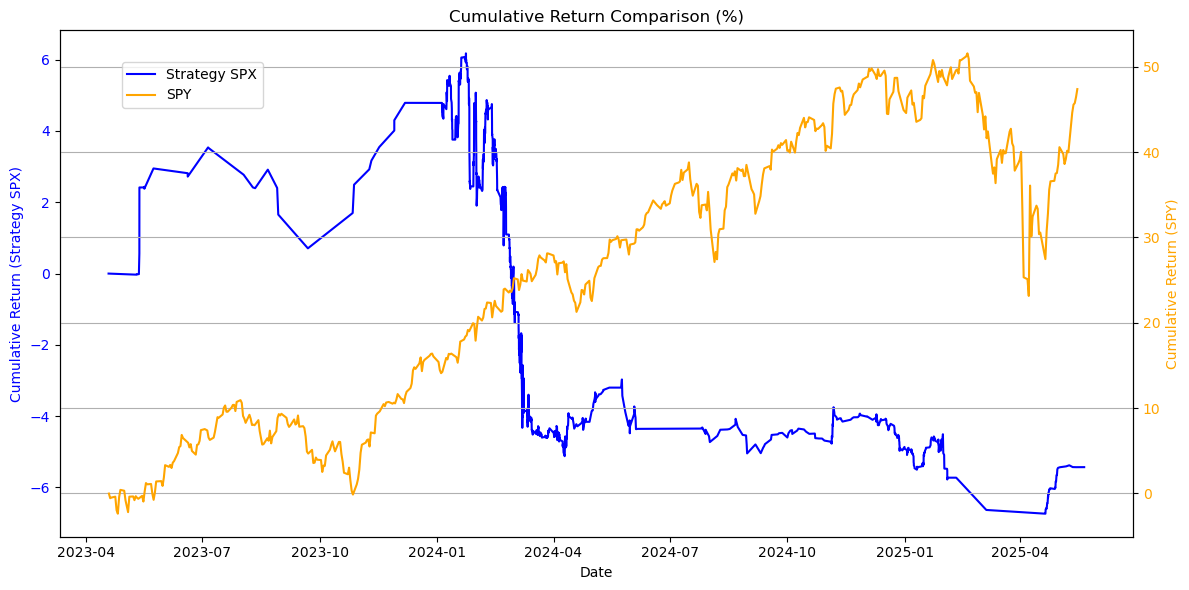

In [583]:
# plot cumulative return for df_spx_sorted and combined_data_spy using two different y-axes 
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the first dataset on the primary y-axis
ax1.plot(df_spx_sorted['Apri'], df_spx_sorted['Cumulative_Return']*100, label='Strategy SPX', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategy SPX)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()
plt.show()

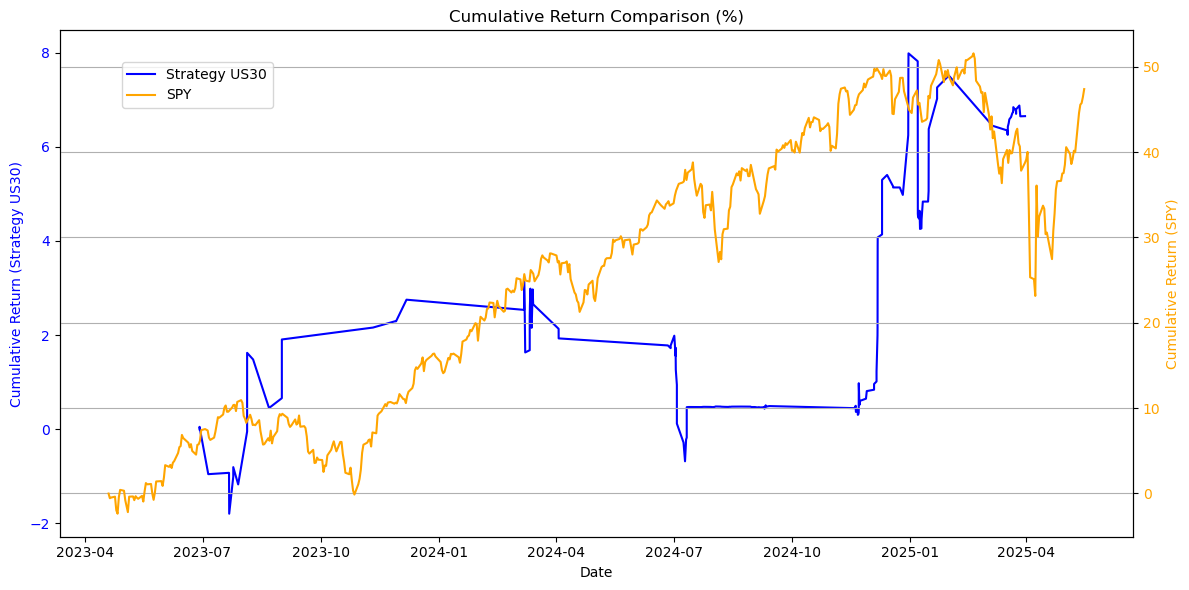

In [585]:
# plot cumulative return for df_us30_sorted and combined_data_dia using two different y-axes 
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the first dataset on the primary y-axis
ax1.plot(df_us30_sorted['Apri'], df_us30_sorted['Cumulative_Return']*100, label='Strategy US30', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategy US30)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()
plt.show()

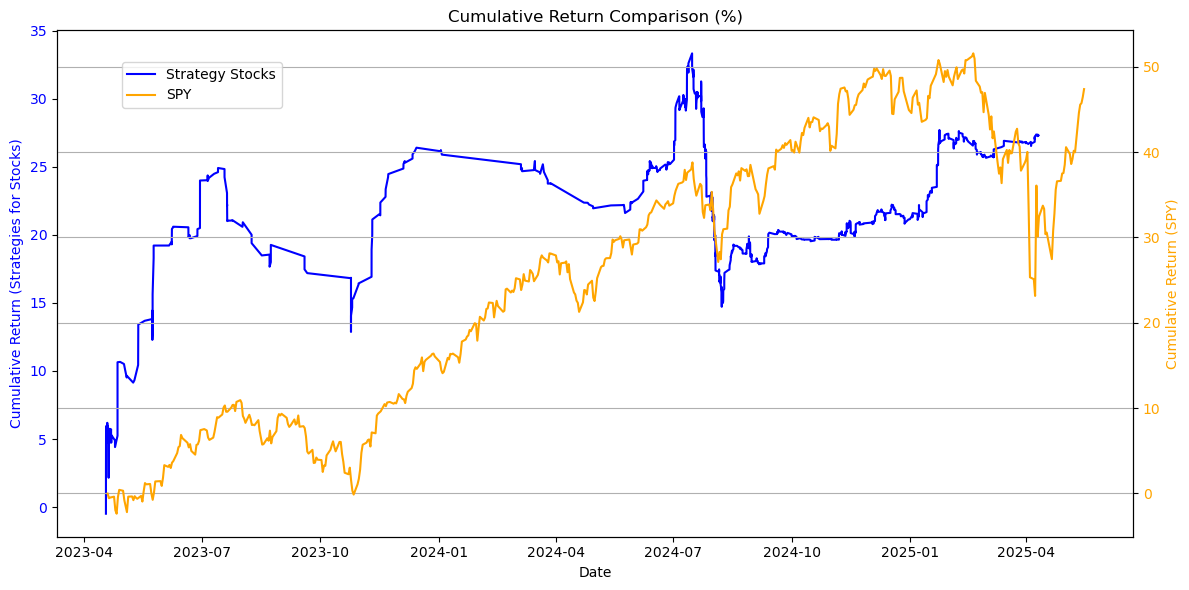

In [586]:
# plot cumulative return for df_stocks_sorted and combined_data_spy using two different y-axes 
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the first dataset on the primary y-axis
ax1.plot(df_stocks_sorted['Apri'], df_stocks_sorted['Cumulative_Return']*100, label='Strategy Stocks', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategies for Stocks)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()
plt.show()

In [587]:
# create df copy
df_total_strategies = df_100_no_5ers.copy()

# sort df_total_strategies by Apri
df_total_strategies_sorted = df_total_strategies.sort_values(by='Apri')

# calculate cumulative return for df_total_strategies_sorted using log returns
df_total_strategies_sorted['Cumulative_Return'] = np.log(1 + df_total_strategies_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

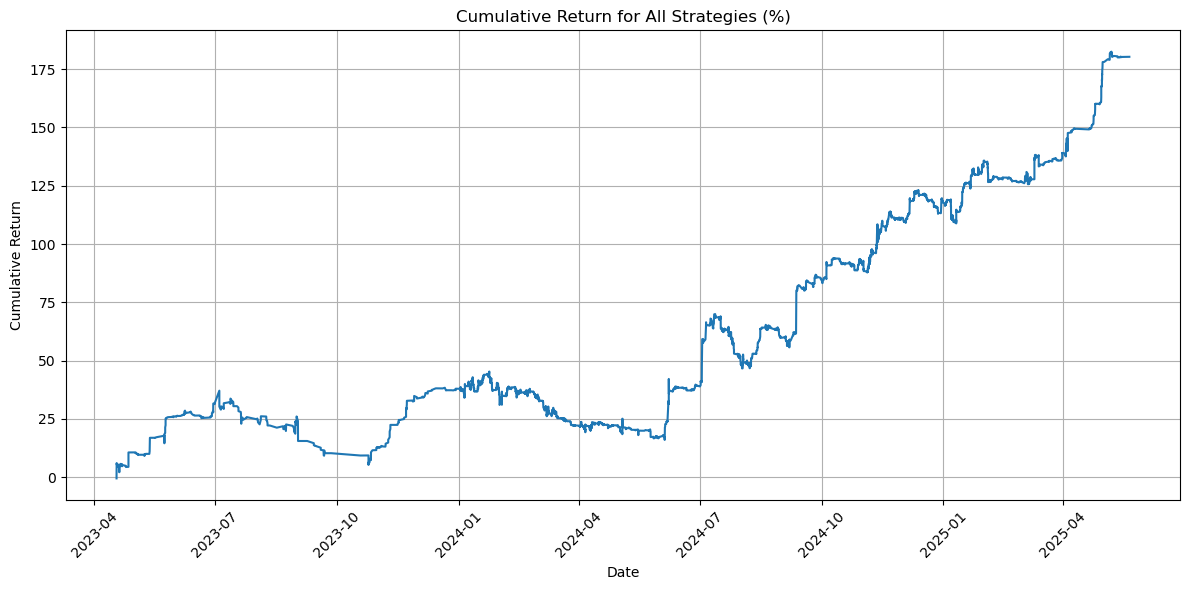

In [588]:
# plot df_total_strategies_sorted
plt.figure(figsize=(12, 6))
plt.plot(df_total_strategies_sorted['Apri'], df_total_strategies_sorted['Cumulative_Return']*100)
plt.title('Cumulative Return for All Strategies (%)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

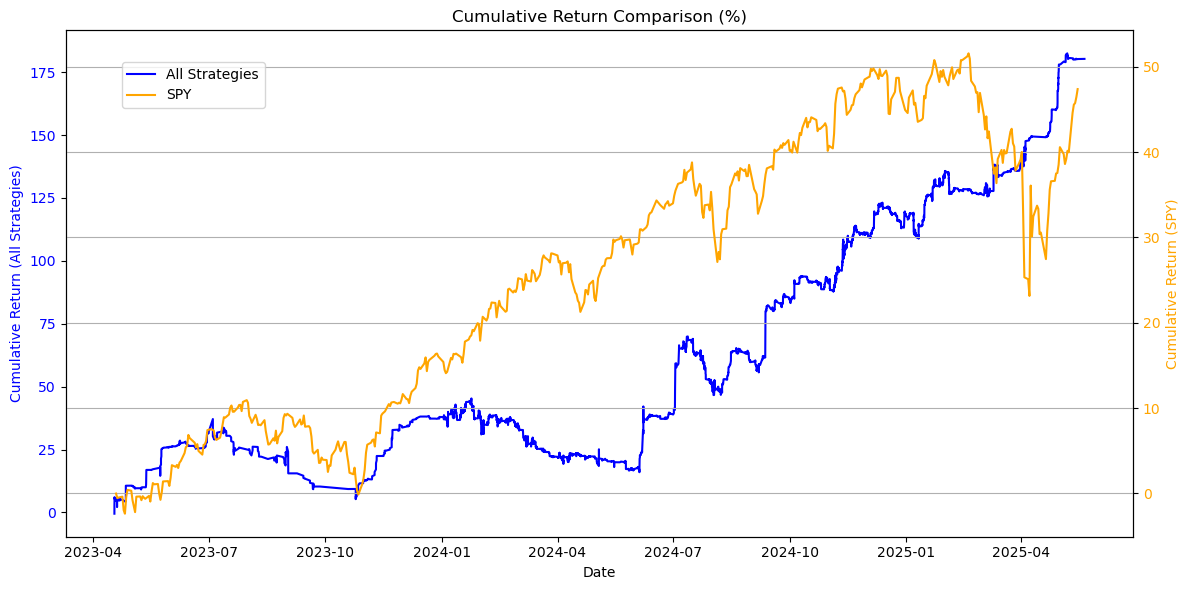

In [589]:
# plot df_total_strategies_sorted and combined_data_spy using two different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the first dataset on the primary y-axis
ax1.plot(df_total_strategies_sorted['Apri'], df_total_strategies_sorted['Cumulative_Return']*100, label='All Strategies', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (All Strategies)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()
plt.show()

## Analysis from csv file

In [ ]:
# # csv url
# url = r'C:\Users\.....................\\combined_data_spy.csv'
# url2 = r'C:\Users\.....................\\combined_data_dia.csv'
# url3 = r'C:\Users\.....................\\combined_data_spy_qqq.csv'

# # read csv file from url
# combined_data_spy = read_csv(url, sep=',', index_col=0, parse_dates=True)
# combined_data_dia = read_csv(url2, sep=',', index_col=0, parse_dates=True)
# combined_data_qqq = read_csv(url3, sep=',', index_col=0, parse_dates=True)

# combined_data_spy.head()

## Analysis from yFinance data

In [591]:
# # download data for SPY from yFinance

# import yfinance as yf

# # ignore warnings
# import warnings
# warnings.filterwarnings("ignore")

# # Define the ticker symbol
# tickers = ['SPY', 'QQQ', 'DIA']

# # Start date is the minimum date of the dataframe df_100_no_5ers
# start_date = df_100_no_5ers['Apri'].min()

# # End date is the maximum date of the dataframe df_100_no_5ers
# end_date = df_100_no_5ers['Chiudi'].max()

# # Get data on this ticker
# tickerData = yf.download(tickers, start=start_date, end=end_date)

# # tickerData = tickerData.reset_index()

# # keep only the columns Date and Close
# # tickerData = tickerData[['Date', 'Close']]
# tickerData = tickerData[['Close']]


# # drop level 0 columns
# tickerData.columns = tickerData.columns.droplevel(0)

# # tickerData.head()

# # keep only column 3   SPY     481 non-null    float64
# tickerData_spy = tickerData[['SPY']]
# tickerData_dia = tickerData[['DIA']]
# tickerData_qqq = tickerData[['QQQ']]

# # rename column SPY to Close
# tickerData_spy.rename(columns={'SPY': 'Close'}, inplace=True)
# tickerData_dia.rename(columns={'DIA': 'Close'}, inplace=True)
# tickerData_qqq.rename(columns={'QQQ': 'Close'}, inplace=True)

# df_sp500 = tickerData_spy.copy()
# df_dia = tickerData_dia.copy()
# df_qqq = tickerData_qqq.copy()

# df_sp500.head()


In [ ]:
# # download df_sp500 to csv
# df_sp500.to_csv(r'C:\Users\.....................\\py\prop\df_sp500.csv', index=True, sep=';')

In [593]:
# tickerData.columns
# tickerData.info()

In [594]:
# combined_data_spy = df_sp500.copy()
# combined_data_dia = df_dia.copy()
# combined_data_qqq = df_qqq.copy()

# combined_data_spy['daily_return'] = combined_data_spy['Close'].pct_change()
# combined_data_dia['daily_return'] = combined_data_dia['Close'].pct_change()
# combined_data_qqq['daily_return'] = combined_data_qqq['Close'].pct_change()

# # calculate the cumulative returns using log returns
# combined_data_spy['cumulative_return'] = np.log(1 + combined_data_spy['daily_return']).cumsum().apply(np.exp) - 1
# combined_data_dia['cumulative_return'] = np.log(1 + combined_data_dia['daily_return']).cumsum().apply(np.exp) - 1
# combined_data_qqq['cumulative_return'] = np.log(1 + combined_data_qqq['daily_return']).cumsum().apply(np.exp) - 1

In [ ]:
# # download to csv combined_data_spy, combined_data_dia and combined_data_qqq
# combined_data_spy.to_csv(r'C:\Users\.....................\\py\prop\combined_data_spy.csv', index=True, sep=';')
# combined_data_dia.to_csv(r'C:\Users\.....................\\py\prop\combined_data_dia.csv', index=True, sep=';')
# combined_data_qqq.to_csv(r'C:\Users\.....................\\py\prop\combined_data_qqq.csv', index=True, sep=';')

In [596]:
# combined_data_spy.info()

In [597]:
# # plot combined_data_qqq['cumulative_return'] 
# plt.figure(figsize=(12, 6))
# plt.plot(combined_data_qqq.index, combined_data_qqq['cumulative_return'])
# plt.title('QQQ Cumulative Return')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Return')
# plt.xticks(rotation=45)
# plt.grid()
# plt.tight_layout()
# plt.show()

In [598]:
# # Use two different y-axes
# fig, ax1 = plt.subplots(figsize=(12, 6))

# # Plot the first dataset on the primary y-axis
# ax1.plot(df_nq_sorted['Apri'], df_nq_sorted['Cumulative_Return'], label='Strategy', color='blue')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Cumulative Return (Strategy)', color='blue')
# ax1.tick_params(axis='y', labelcolor='blue')

# # Create a secondary y-axis for the second dataset
# ax2 = ax1.twinx()
# ax2.plot(combined_data_qqq.index, combined_data_qqq['cumulative_return'], label='QQQ', color='orange')
# ax2.set_ylabel('Cumulative Return (QQQ)', color='orange')
# ax2.tick_params(axis='y', labelcolor='orange')

# # Add title and legend
# plt.title('Cumulative Return Comparison')
# fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
# plt.grid()
# plt.tight_layout()
# plt.show()

In [599]:
# ## Check calculation of cumulative return for df_us30_sorted, seams to be wrong

# # plot cumulative return for df_us30_sorted and combined_data_dia using two different y-axes 
# fig, ax1 = plt.subplots(figsize=(12, 6))
# # Plot the first dataset on the primary y-axis
# ax1.plot(df_us30_sorted['Apri'], df_us30_sorted['Cumulative_Return'], label='Strategy', color='blue')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Cumulative Return (Strategy)', color='blue')
# ax1.tick_params(axis='y', labelcolor='blue')

# # Create a secondary y-axis for the second dataset
# ax2 = ax1.twinx()
# ax2.plot(combined_data_dia.index, combined_data_dia['cumulative_return'], label='DIA', color='orange')
# ax2.set_ylabel('Cumulative Return (DIA)', color='orange')
# ax2.tick_params(axis='y', labelcolor='orange')
# # Add title and legend
# plt.title('Cumulative Return Comparison')
# fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
# plt.grid()
# plt.tight_layout()
# plt.show()

## From here on, analysis is the same for yFinance and obb libraries

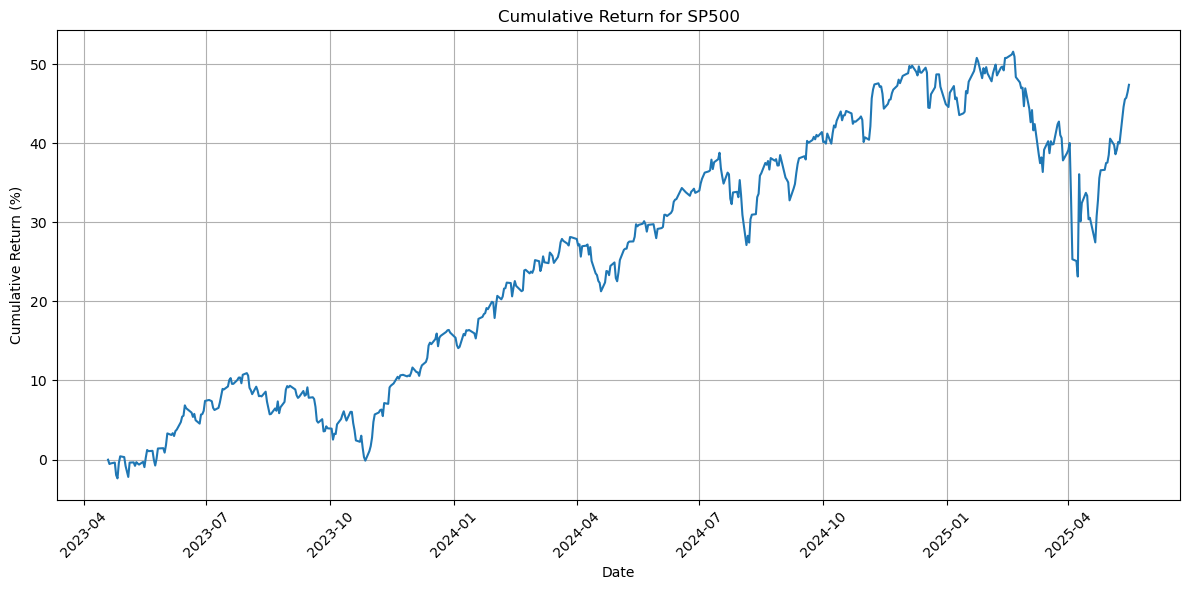

In [600]:
# plot combined_data_spy cumulative_return column
plt.figure(figsize=(12, 6))
plt.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SP500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Return for SP500')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

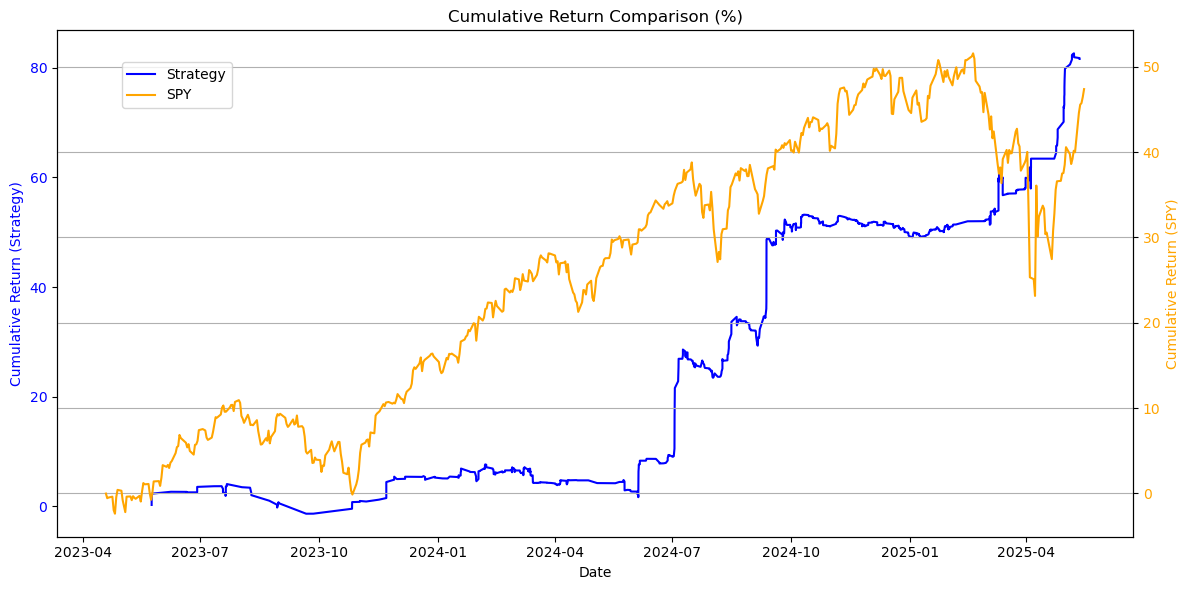

In [601]:
# plot cumulative return for df_nq_sorted and combined_data_spy using two different y-axes 
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the first dataset on the primary y-axis
ax1.plot(df_nq_sorted['Apri'], df_nq_sorted['Cumulative_Return']*100, label='Strategy', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategy)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()
plt.show()

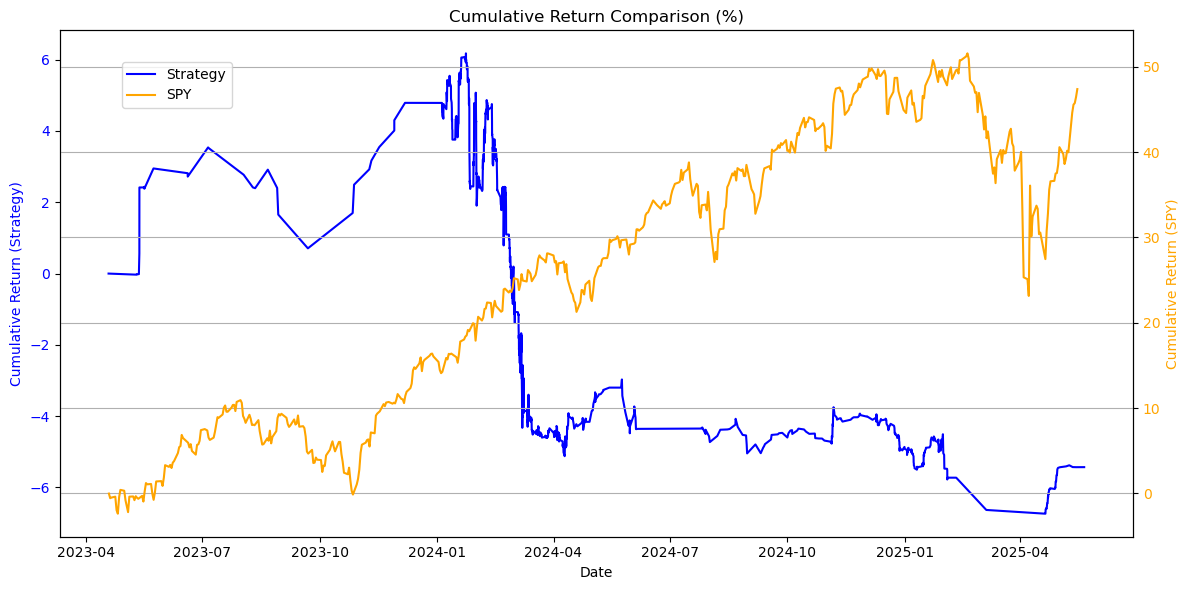

In [602]:
# plot cumulative return for df_spx_sorted and combined_data_spy using two different y-axes 
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the first dataset on the primary y-axis
ax1.plot(df_spx_sorted['Apri'], df_spx_sorted['Cumulative_Return']*100, label='Strategy', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategy)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()
plt.show()

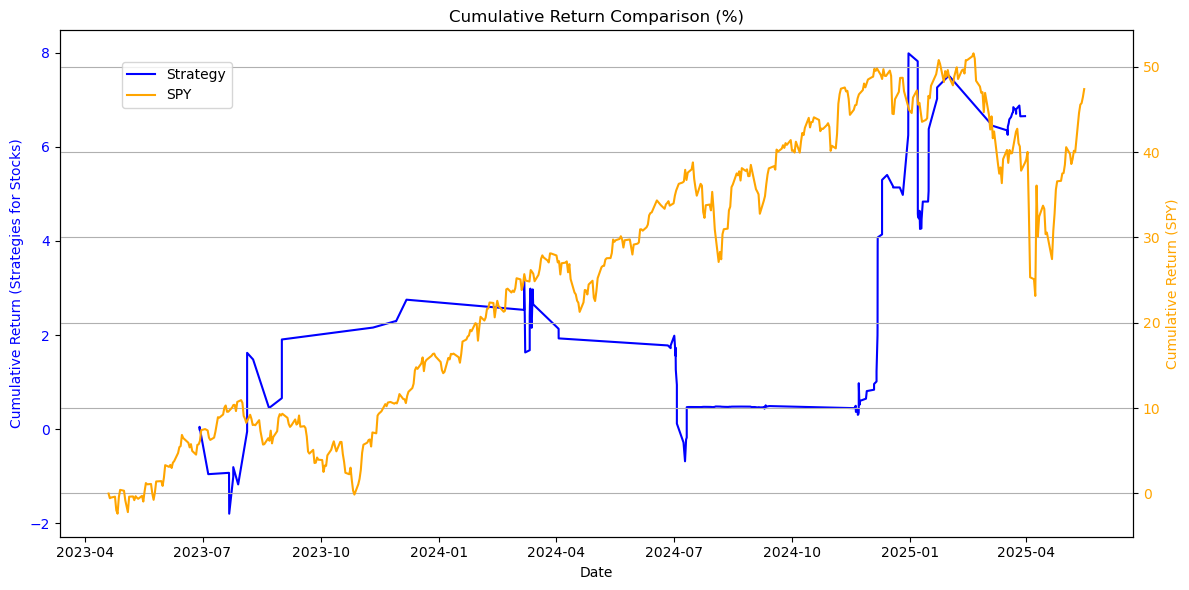

In [603]:
# plot cumulative return for df_us30_sorted and combined_data_spy using two different y-axes 
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the first dataset on the primary y-axis
ax1.plot(df_us30_sorted['Apri'], df_us30_sorted['Cumulative_Return']*100, label='Strategy', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategies for Stocks)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()
plt.show()

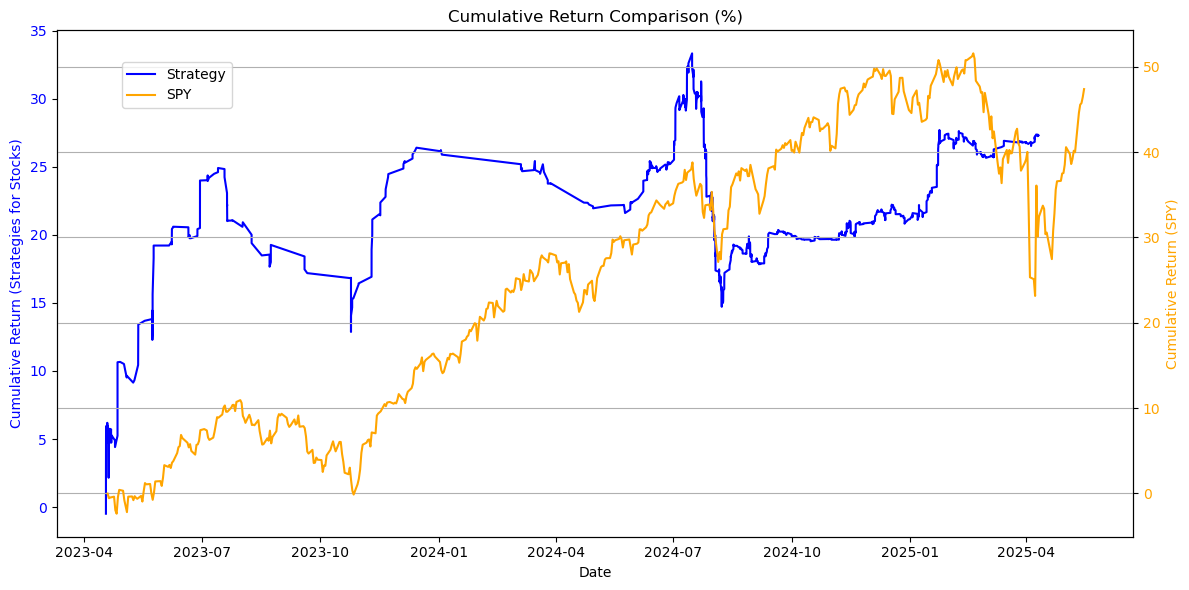

In [604]:
# plot cumulative return for df_stocks_sorted and combined_data_spy using two different y-axes 
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the first dataset on the primary y-axis
ax1.plot(df_stocks_sorted['Apri'], df_stocks_sorted['Cumulative_Return']*100, label='Strategy', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategies for Stocks)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()
plt.show()

In [605]:
# create df copy
df_total_strategies = df_100_no_5ers.copy()

# sort df_total_strategies by Apri
df_total_strategies_sorted = df_total_strategies.sort_values(by='Apri')

# calculate cumulative return for df_total_strategies_sorted using log returns
df_total_strategies_sorted['Cumulative_Return'] = np.log(1 + df_total_strategies_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

## Cumulative Return for All Strategies

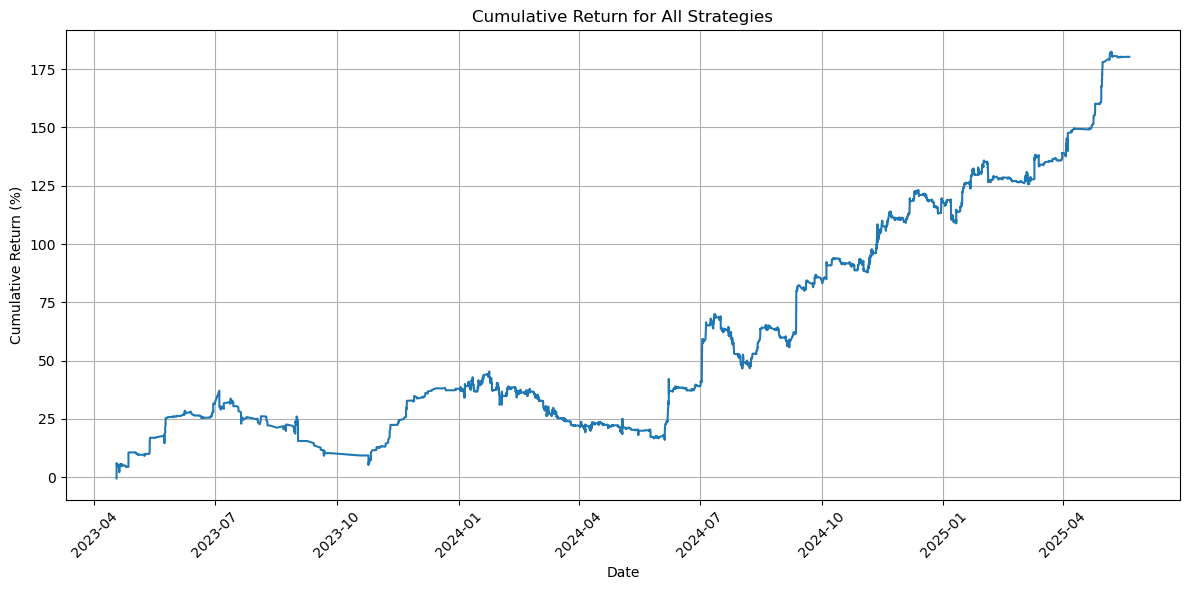

In [606]:
# plot df_total_strategies_sorted
plt.figure(figsize=(12, 6))
plt.plot(df_total_strategies_sorted['Apri'], df_total_strategies_sorted['Cumulative_Return']*100)
plt.title('Cumulative Return for All Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

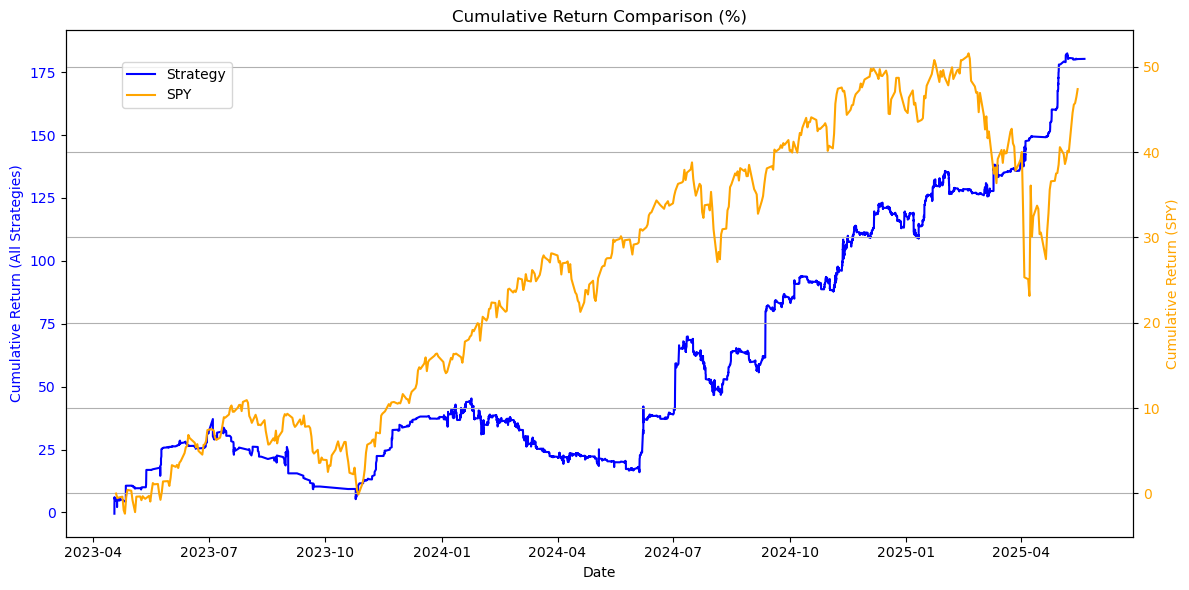

In [607]:
# plot df_total_strategies_sorted and combined_data_spy using two different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the first dataset on the primary y-axis
ax1.plot(df_total_strategies_sorted['Apri'], df_total_strategies_sorted['Cumulative_Return']*100, label='Strategy', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (All Strategies)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()
plt.show()


In [608]:
# df_total_strategies.info()

# drop na
combined_data_spy = combined_data_spy.dropna()

combined_data_spy.head()

,Open,High,Low,Close,Volume,daily_return,cumulative_return
Date,,,,,,,
2023-04-19,401.229141,404.012871,401.170743,403.097961,55227300,-0.000169,-0.000169
2023-04-20,400.246075,402.669705,399.331135,400.898224,75840400,-0.005457,-0.005625
2023-04-21,401.199974,401.676900,399.233843,401.209717,73457400,0.000777,-0.004852
2023-04-24,401.005315,402.056536,399.652391,401.628265,64332100,0.001043,-0.003814
2023-04-25,399.632826,400.197378,395.194410,395.252808,97766700,-0.015874,-0.019628


In [612]:
# Calculate the maximum drawdown of spy
daily_returns_spy = combined_data_spy['Close'].pct_change()

cumulative_returns_spy = (1 + daily_returns_spy).cumprod() # here in internet they add -1

cumulative_max_spy = cumulative_returns_spy.cummax()

drawdown_spy = (cumulative_returns_spy - cumulative_max_spy) / cumulative_max_spy

max_drawdown_spy = drawdown_spy.min()
print(f"Max Drawdown: {max_drawdown_spy:.2%}")

Max Drawdown: -18.76%


In [613]:
# # Ok, correct
# # plot cumulative_returns_spy
# plt.figure(figsize=(12, 6))
# plt.plot(cumulative_returns_spy)
# plt.title('Cumulative Returns for SPY')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Returns')
# plt.xticks(rotation=45)
# plt.grid()
# plt.tight_layout()
# plt.show()

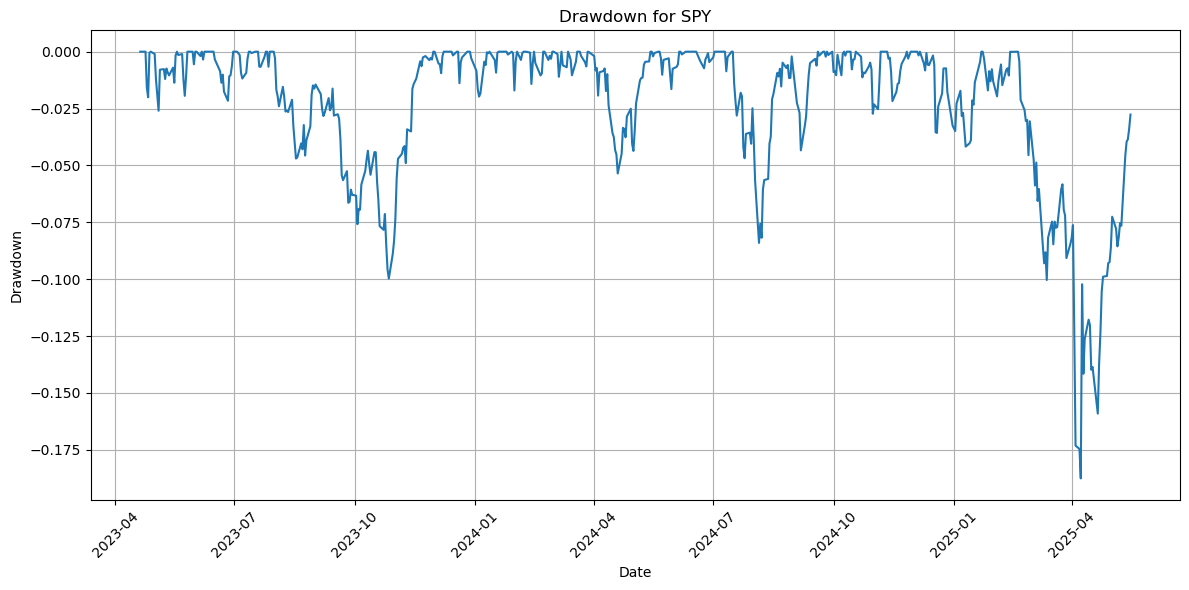

In [614]:
# plot drawdown_spy
plt.figure(figsize=(12, 6))
plt.plot(drawdown_spy)
plt.title('Drawdown for SPY')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [615]:
# 3
daily_returns_strategies = df_total_strategies_sorted.groupby(['Month', 'Year', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# Ordina per data (opzionale, ma utile per il plot)
daily_returns_strategies = daily_returns_strategies.sort_values(['Year', 'Month', 'Day'])

# Crea una colonna data per l'asse x
daily_returns_strategies['Date'] = pd.to_datetime(daily_returns_strategies[['Year', 'Month', 'Day']])

# drop Month	Year	Day
daily_returns_strategies = daily_returns_strategies.drop(columns=['Month', 'Year', 'Day'])

# set index to Date
daily_returns_strategies = daily_returns_strategies.set_index('Date')

daily_returns_strategies.head()

,Profit_pct_100
Date,
2023-04-17,5.378075
2023-04-18,-0.010950
2023-04-19,-0.506650
2023-04-20,-0.060825
2023-04-21,0.531125


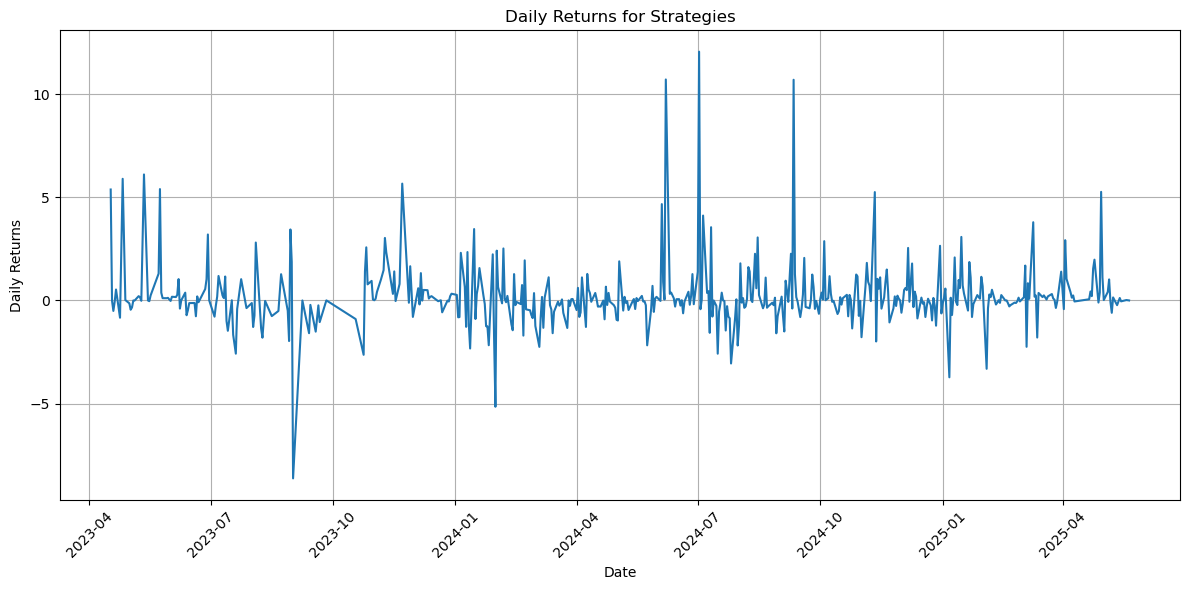

In [616]:
# plot Profit_pct_100
plt.figure(figsize=(12, 6))
plt.plot(daily_returns_strategies.index, daily_returns_strategies['Profit_pct_100'])
plt.title('Daily Returns for Strategies')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## Download here the csv daily_returns_spy and daily_returns_strategies for quantstats analysis

## Don't forget to change the code at the beginning of the notebook before downloading the csv files

In [ ]:
# # daily_returns_spy and daily_returns_strategies
# daily_returns_spy.to_csv(r'C:\Users\.....................\\py\prop\daily_returns_spy.csv', index=True, sep=';')
# daily_returns_strategies.to_csv(r'C:\Users\.....................\\py\prop\daily_returns_strategies.csv', index=True, sep=';')

In [618]:
# df_total_strategies_sorted.head()

## Below cell can be used only if we use the quantstats version of data at the beginning of the notebook

In [619]:
# # Use only with quantstats version of the notebook

# cumulative_returns_strategies = (1 + daily_returns_strategies).cumprod()  # here in internet they add -1 

# cumulative_max_strategies = cumulative_returns_strategies.cummax()

# drawdown_strategies = (cumulative_returns_strategies - cumulative_max_strategies) / cumulative_max_strategies

# max_drawdown_strategies = drawdown_strategies.min().min()
# print(f"Max Drawdown: {max_drawdown_strategies:.2%}")
# # print(f"Max Drawdown: {max_drawdown_strategies:.2%}")